#📌 Extração

In [ ]:
import pandas as pd
import requests

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [ ]:
data = pd.read_json(url)

In [ ]:
data.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
data.shape

(7267, 6)

In [ ]:
response = requests.get(url)
data = response.json()


In [ ]:
data = pd.json_normalize(data)
data.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

#🔧 Transformação

In [ ]:
# Com os dados normalizados, iremos fazer uma cópia do dataframe para fazer as explorações.

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df.shape

(7267, 21)

In [ ]:
print(f'O conjunto de dados possui {df.shape[0]} linhas e \
{df.shape[1]} colunas')

O conjunto de dados possui 7267 linhas e 21 colunas


In [ ]:
# Verificação de dados nulos.

df.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [ ]:
df.isna().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [ ]:
# Vamos começar a analisar cada variável do dataframe

______________________________________________________________

In [ ]:
# customerID é o número de identificação único de cada cliente.
# É formado pela sequência de 4 números, um traço, e 5 letras maiúsculas, como 0000-AAAAA

In [ ]:
df['customerID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [ ]:
df['customerID'].describe()

count           7267
unique          7267
top       9995-HOTOH
freq               1
Name: customerID, dtype: object

In [ ]:
# Não temos ids repetidos, o que poderia representar clientes duplicados

In [ ]:
import re
valores = df['customerID']
padrao = r'^[0-9]{4}-[A-Z]{5}'

contador_true = 0
contador_false = 0

for i in valores:
  if re.match(padrao, i):
    contador_true = contador_true + 1
  else:
    contador_false = contador_false + 1

print(f'Match: {contador_true}')
print(f'No match: {contador_false}')

Match: 7267
No match: 0


In [ ]:
# Alteração do nome da coluna
df = df.rename(columns={'customerID': 'id_cliente'})

In [ ]:
df['id_cliente'].describe()

count           7267
unique          7267
top       9995-HOTOH
freq               1
Name: id_cliente, dtype: object

______________________________________________________________

In [ ]:
# Churn indica se o cliente deixou ou não a empresa
# Se ele não deixou (No), ele é um cliente ativo
# Se ele deixou (Yes), ele é um cliente inativo
# Além das respostas, há espaços em branco.

In [ ]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [ ]:
# Vamos inverter a lógica do dicionário de dados.

In [ ]:
df = df.rename(columns={'Churn': 'cliente_ativo'})
df['cliente_ativo'] = df['cliente_ativo'].replace({'Yes': 'Não', 'No': 'Sim', '': 'Não informado'})

In [ ]:
df['cliente_ativo'].value_counts()

cliente_ativo
Sim              5174
Não              1869
Não informado     224
Name: count, dtype: int64

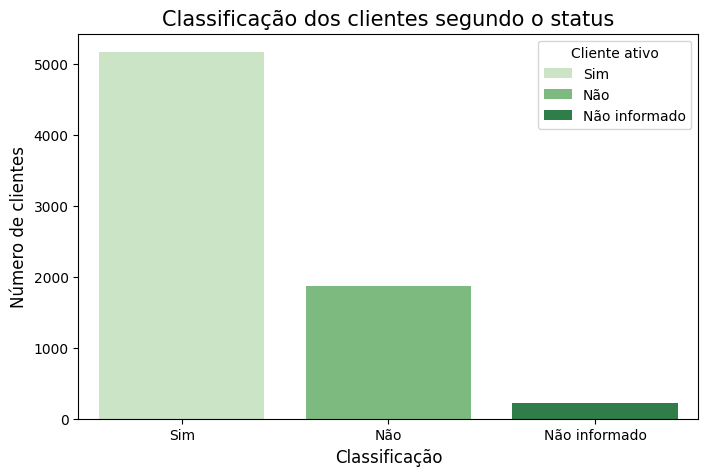

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='cliente_ativo', palette='Greens', hue='cliente_ativo',  legend=True)

plt.title('Classificação dos clientes segundo o status', fontsize=15)
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Cliente ativo')

plt.show()


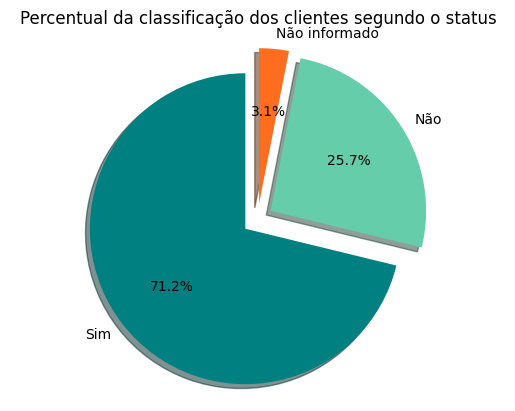

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não', 'Não informado'
sizes = [5174, 1869, 224]
explode= [0.1, 0.1, 0.1]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa','#ff6e1e'])
ax.axis('equal')
plt.title('Percentual da classificação dos clientes segundo o status')

plt.show()

In [ ]:
total = 7267
vazio = 224

resultado = round(vazio / total * 100, 1)
print(f'Do total de {total} linhas, {vazio} tem espaço vazio, o que perfaz {resultado} % dos casos')


Do total de 7267 linhas, 224 tem espaço vazio, o que perfaz 3.1 % dos casos


In [ ]:
# Assim considerando, dada a baixa magnitude, optaremos por retirar os dados

______________________________________________________________

In [ ]:
# customer.gender refere-se ao gênero do cliente, masculino ou feminino.

In [ ]:
df['customer.gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df = df.rename(columns={'customer.gender': 'genero'})
df['genero'] = df['genero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})

In [ ]:
df['genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [ ]:
df['genero'].value_counts()

genero
Masculino    3675
Feminino     3592
Name: count, dtype: int64

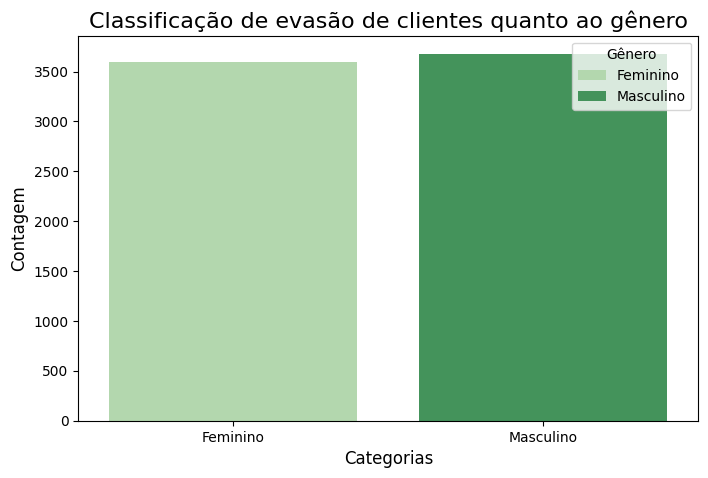

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='genero', palette='Greens', hue='genero', legend=True)

plt.title('Classificação de evasão de clientes quanto ao gênero', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Gênero')

plt.show()


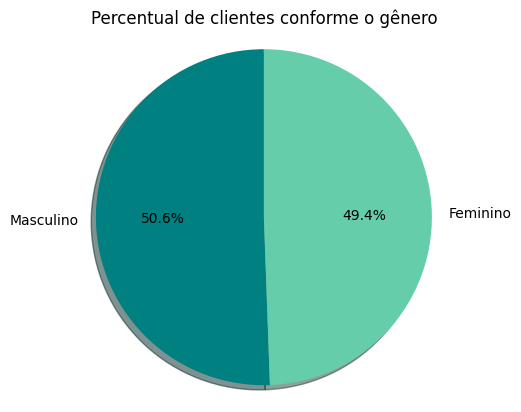

In [ ]:
import matplotlib.pyplot as plt


labels = 'Masculino', 'Feminino'
sizes = [3675, 3592]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax.axis('equal')
plt.title('Percentual de clientes conforme o gênero')

plt.show()

______________________________________________________________


In [ ]:
# Se o cliente tem idade maior ou igual a 65 anos. Valor 1, Sim, e valor 0, Não

In [ ]:
df['customer.SeniorCitizen'].unique()

array([0, 1])

In [ ]:
df['customer.SeniorCitizen'].value_counts()

customer.SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'customer.SeniorCitizen': 'cliente_idoso'})
df['cliente_idoso'] = df['cliente_idoso'].replace({1: 'Sim', 0: 'Não'})

In [ ]:
df['cliente_idoso'].unique()

array(['Não', 'Sim'], dtype=object)

In [ ]:
df['cliente_idoso'].value_counts()

cliente_idoso
Não    6085
Sim    1182
Name: count, dtype: int64

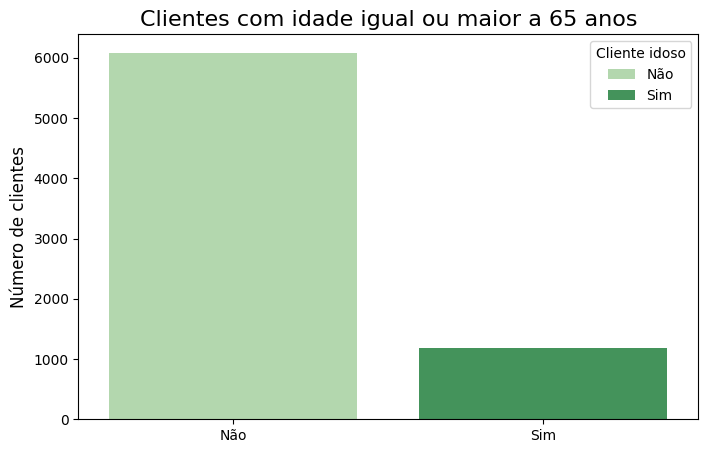

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='cliente_idoso', palette='Greens', hue='cliente_idoso',  legend=True)

plt.title('Clientes com idade igual ou maior a 65 anos', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Cliente idoso')

plt.show()

______________________________________________________________

In [ ]:
# customer.Partner: se o cliente possui ou não um parceiro ou parceira, cônjuge, convivente

In [ ]:
df['customer.Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['customer.Partner'].value_counts()

customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

In [ ]:
percentual = round(3749 / 7267 * 100, 1)
percentual

51.6

In [ ]:
percentual = round(3518 / 7267 * 100, 1)
percentual

48.4

In [ ]:
df = df.rename(columns={'customer.Partner': 'cliente_parceiro'})
df['cliente_parceiro'] = df['cliente_parceiro'].replace({'Yes': 'Sim', 'No': 'Não'})

In [ ]:
df['cliente_parceiro'].unique()

array(['Sim', 'Não'], dtype=object)

In [ ]:
df['cliente_parceiro'].value_counts()

cliente_parceiro
Não    3749
Sim    3518
Name: count, dtype: int64

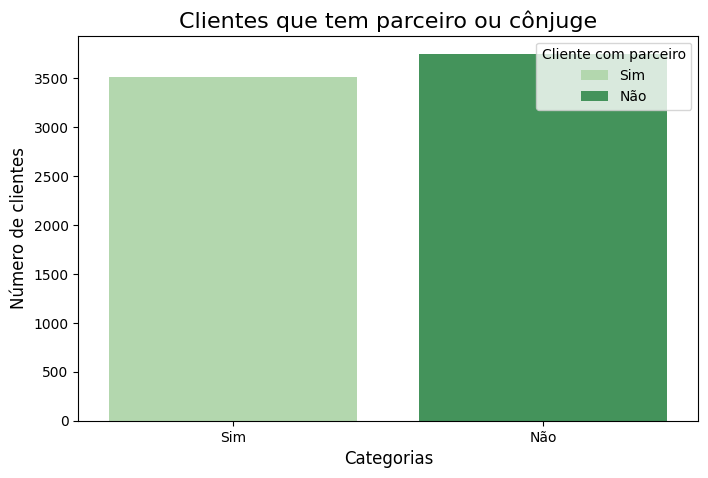

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='cliente_parceiro', palette='Greens', hue='cliente_parceiro', legend=True)

plt.title('Clientes que tem parceiro ou cônjuge', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Cliente com parceiro')

plt.show()

______________________________________________________________

In [ ]:
# customer.Dependents: se o cliente possui ou não dependentes
# Para a previdência social, podem ser dependentes de classe 1: cônjuge, companheiro e filhos até 21 anos de idade ou deficientes

In [ ]:
df['customer.Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['customer.Dependents'].value_counts()

customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

In [ ]:
percentual = round(5086 / 7267 * 100, 1)
percentual

70.0

In [ ]:
df = df.rename(columns={'customer.Dependents': 'cliente_dependentes'})
df['cliente_dependentes'] = df['cliente_dependentes'].replace({'Yes': 'Sim', 'No': 'Não'})

In [ ]:
df['cliente_dependentes'].unique()

array(['Sim', 'Não'], dtype=object)

In [ ]:
df['cliente_dependentes'].value_counts()

cliente_dependentes
Não    5086
Sim    2181
Name: count, dtype: int64

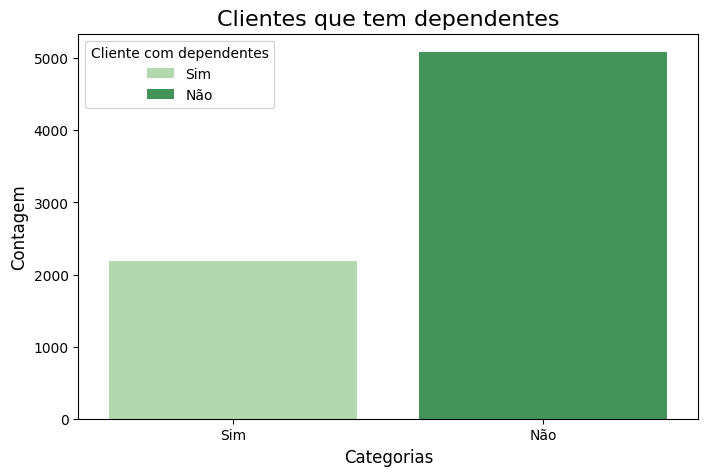

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='cliente_dependentes', palette='Greens', hue='cliente_dependentes', legend=True)

plt.title('Clientes que tem dependentes', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Cliente com dependentes')
plt.show()

______________________________________________________________


In [ ]:
# customer.tenure é o número de meses de contrato do cliente

In [ ]:
df['customer.tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [ ]:
df['customer.tenure'].count()

np.int64(7267)

In [ ]:
df['customer.tenure'].unique().max()

np.int64(72)

In [ ]:
df['customer.tenure'].unique().min()

np.int64(0)

In [ ]:
# quando o número de meses de contrato é igual a 0, não tem também o preenchimento (" ") da coluna "account.Charges.Total". Ainda não completaram \
# o primeiro mês de contrato.

In [ ]:
df.query('`customer.tenure` == 0')

id_cliente cliente_ativo     genero cliente_idoso cliente_parceiro  \
975   1371-DWPAZ           Sim   Feminino           Não              Sim   
1775  2520-SGTTA           Sim   Feminino           Não              Sim   
1955  2775-SEFEE           Sim  Masculino           Não              Não   
2075  2923-ARZLG           Sim  Masculino           Não              Sim   
2232  3115-CZMZD           Sim  Masculino           Não              Não   
2308  3213-VVOLG           Sim  Masculino           Não              Sim   
2930  4075-WKNIU           Sim   Feminino           Não              Sim   
3134  4367-NUYAO           Sim  Masculino           Não              Sim   
3203  4472-LVYGI           Sim   Feminino           Não              Sim   
4169  5709-LVOEQ           Sim   Feminino           Não              Sim   
5599  7644-OMVMY           Sim  Masculino           Não              Sim   

     cliente_dependentes  customer.tenure phone.PhoneService  \
975                  Sim                0                 No   
1775                 Sim                0                Yes   
1955                 Sim                0                Yes   
2075                 Sim                0                Yes   
2232                 Sim                0                Yes   
2308                 Sim                0                Yes   
2930                 Sim                0                Yes   
3134                 Sim                0                Yes   
3203                 Sim                0                 No   
4169                 Sim                0                Yes   
5599                 Sim                0                Yes   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
975     No phone service                      DSL  ...                   Yes   
1775                  No                       No  ...   No internet service   
1955                 Yes                      DSL  ...                   Yes   
2075                  No                       No  ...   No internet service   
2232                  No                       No  ...   No internet service   
2308                 Yes                       No  ...   No internet service   
2930                 Yes                      DSL  ...                   Yes   
3134                 Yes                       No  ...   No internet service   
3203    No phone service                      DSL  ...                    No   
4169                  No                      DSL  ...                   Yes   
5599                  No                       No  ...   No internet service   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
975                        Yes                  Yes                  Yes   
1775       No internet service  No internet service  No internet service   
1955                        No                  Yes                   No   
2075       No internet service  No internet service  No internet service   
2232       No internet service  No internet service  No internet service   
2308       No internet service  No internet service  No internet service   
2930                       Yes                  Yes                  Yes   
3134       No internet service  No internet service  No internet service   
3203                       Yes                  Yes                  Yes   
4169                       Yes                   No                  Yes   
5599       No internet service  No internet service  No internet service   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
975                        No         Two year                       No   
1775      No internet service         Two year                       No   
1955                       No         Two year                      Yes   
2075      No internet service         One year                      Yes   
2232      No internet service         Two year                       No   


In [ ]:
df = df.rename(columns={'customer.tenure': 'meses_contrato'})

In [ ]:
df['meses_contrato'].describe()

count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: meses_contrato, dtype: float64

In [ ]:
df['meses_contrato'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

______________________________________________________________

In [ ]:
# phone.PhoneService - se o cliente possui assinatura de serviço telefônico

In [ ]:
df['phone.PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['phone.PhoneService'].value_counts()

phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

In [ ]:
percentual = round(6560 / 7267 * 100, 1)
percentual

90.3

In [ ]:
percentual = round(707 / 7267 * 100, 1)
percentual

9.7

In [ ]:
df = df.rename(columns={'phone.PhoneService': 'linha_telefonica'})
df['linha_telefonica'] = df['linha_telefonica'].replace({'Yes': 'Sim', 'No': 'Não'})

In [ ]:
df['linha_telefonica'].unique()

array(['Sim', 'Não'], dtype=object)

In [ ]:
df['linha_telefonica'].value_counts()

linha_telefonica
Sim    6560
Não     707
Name: count, dtype: int64

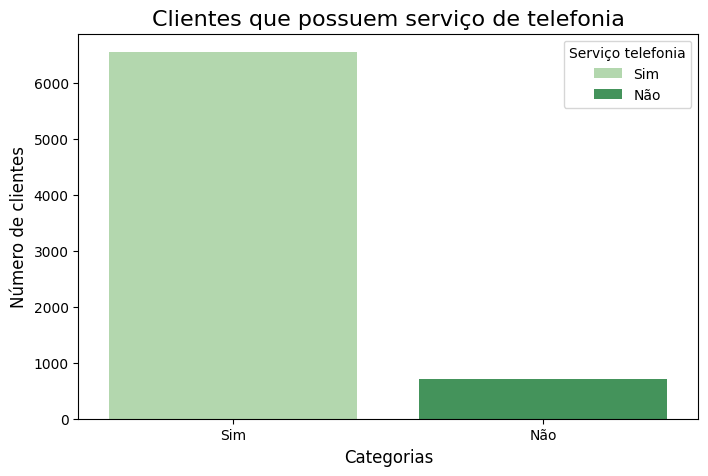

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='linha_telefonica', palette='Greens', hue='linha_telefonica', legend=True)

plt.title('Clientes que possuem serviço de telefonia', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Serviço telefonia')

plt.show()

______________________________________________________________

In [ ]:
# phone.MultipleLines se o cliente possui mais de uma linha telefônica

In [ ]:
df['phone.MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [ ]:
df['phone.MultipleLines'].value_counts()

phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'phone.MultipleLines': 'multiplas_linhas'})
df['multiplas_linhas'] = df['multiplas_linhas'].replace({'Yes': 'Sim', 'No': 'Não', 'No phone service': 'Não'})

In [ ]:
df['multiplas_linhas'].unique()

array(['Não', 'Sim'], dtype=object)

In [ ]:
df['multiplas_linhas'].value_counts()

multiplas_linhas
Não    4202
Sim    3065
Name: count, dtype: int64

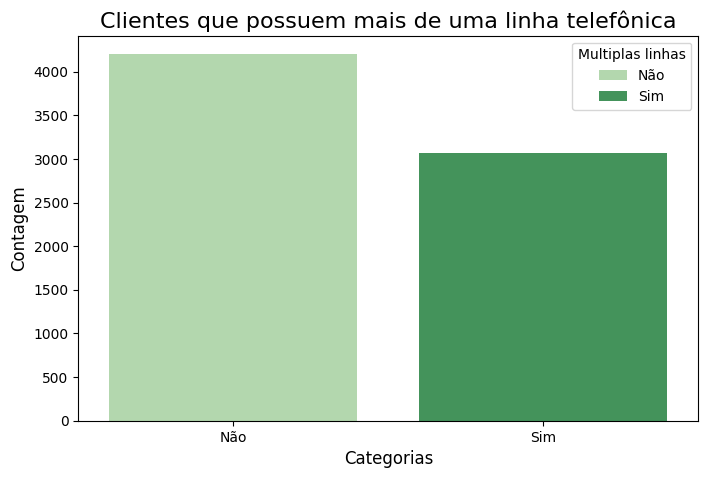

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='multiplas_linhas', palette='Greens', hue='multiplas_linhas', legend=True)

plt.title('Clientes que possuem mais de uma linha telefônica', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Multiplas linhas')
plt.show()

______________________________________________________________

In [ ]:
# InternetService: cliente que possui assinatura de um provedor internet

In [ ]:
df['internet.InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df['internet.InternetService'].value_counts()

internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'internet.InternetService': 'provedor_internet'})
df['provedor_internet'] = df['provedor_internet'].replace({'Fiber optic': 'Fibra óptica', 'DSL': 'DSL', 'No': 'Sem serviço de internet'})

In [ ]:
df['provedor_internet'].unique()

array(['DSL', 'Fibra óptica', 'Sem serviço de internet'], dtype=object)

In [ ]:
df['provedor_internet'].value_counts()

provedor_internet
Fibra óptica               3198
DSL                        2488
Sem serviço de internet    1581
Name: count, dtype: int64

In [ ]:
# A Digital Subscriber Line (DSL) é uma tecnologia de transmissão de dados que utiliza a linha telefônica convencional para
# fornecer conexão de internet de alta velocidade.
# A fibra óptica é um meio de transmissão de dados que utiliza filamentos de vidro ou plástico para transmitir luz, permitindo
# a comunicação em alta velocidade e com baixa perda de sinal.

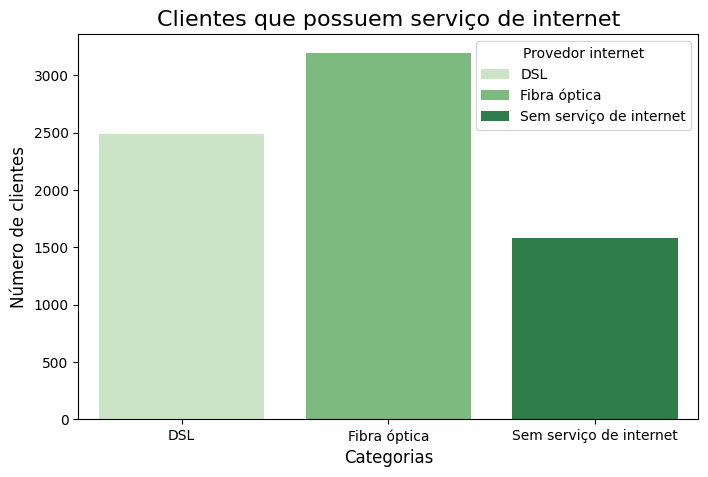

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='provedor_internet', palette='Greens', hue='provedor_internet', legend=True)

plt.title('Clientes que possuem serviço de internet', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Provedor internet')

plt.show()

______________________________________________________________

In [ ]:
# OnlineSecurity: assinatura adicional de segurança online

In [ ]:
df['internet.OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['internet.OnlineSecurity'].value_counts()

internet.OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'internet.OnlineSecurity': 'seguranca_online'})
df['seguranca_online'] = df['seguranca_online'].replace({'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Não'})

In [ ]:
df['seguranca_online'].unique()

array(['Não', 'Sim'], dtype=object)

In [ ]:
df['seguranca_online'].value_counts()

seguranca_online
Não    5189
Sim    2078
Name: count, dtype: int64

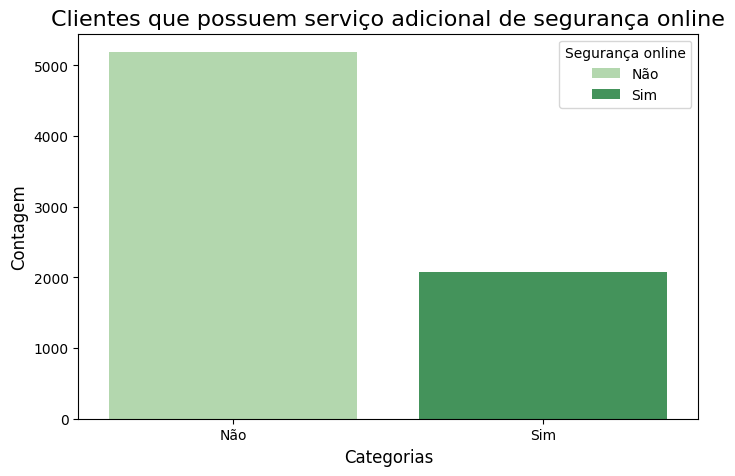

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='seguranca_online', palette='Greens', hue='seguranca_online', legend=True)

plt.title('Clientes que possuem serviço adicional de segurança online', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Segurança online')

plt.show()

______________________________________________________________

In [ ]:
df['internet.OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['internet.OnlineBackup'].value_counts()

internet.OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'internet.OnlineBackup': 'backup_online'})
df['backup_online'] = df['backup_online'].replace({'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Não'})

In [ ]:
df['backup_online'].unique()

array(['Sim', 'Não'], dtype=object)

In [ ]:
df['backup_online'].value_counts()

backup_online
Não    4763
Sim    2504
Name: count, dtype: int64

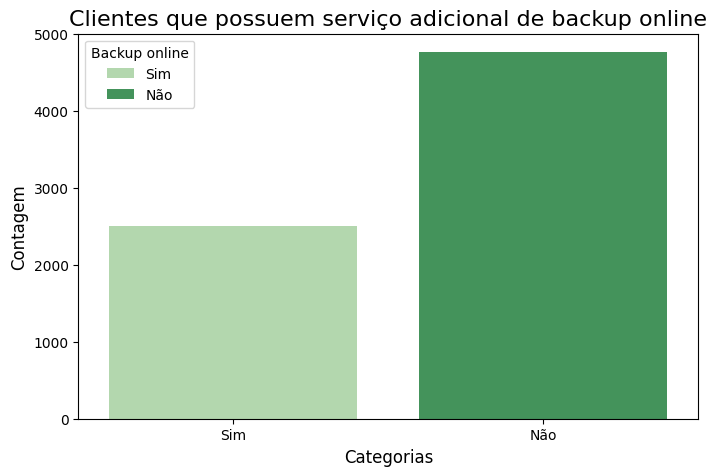

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='backup_online', palette='Greens', hue='backup_online', legend=True)

plt.title('Clientes que possuem serviço adicional de backup online', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Backup online')

plt.show()

______________________________________________________________

In [ ]:
df['internet.DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['internet.DeviceProtection'].value_counts()

internet.DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'internet.DeviceProtection': 'protecao_dispositivo'})
df['protecao_dispositivo'] = df['protecao_dispositivo'].replace({'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Não'})

In [ ]:
df['protecao_dispositivo'].unique()

array(['Não', 'Sim'], dtype=object)

In [ ]:
df['protecao_dispositivo'].value_counts()

protecao_dispositivo
Não    4776
Sim    2491
Name: count, dtype: int64

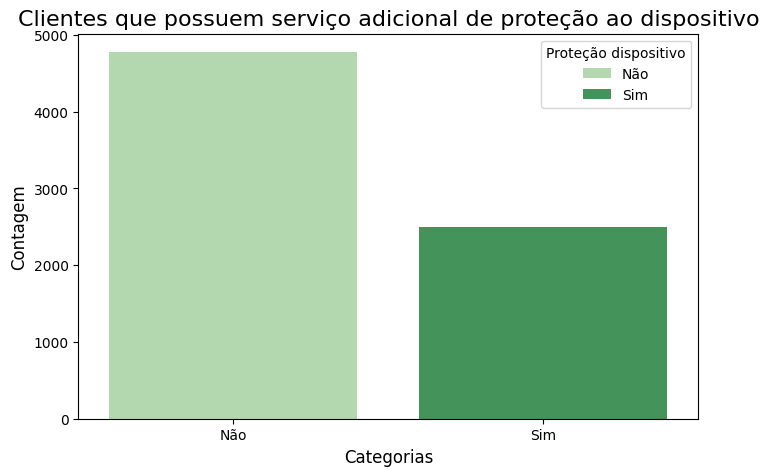

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='protecao_dispositivo', palette='Greens', hue='protecao_dispositivo', legend=True)

plt.title('Clientes que possuem serviço adicional de proteção ao dispositivo', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Proteção dispositivo')

plt.show()

______________________________________________________________

In [ ]:
df['internet.TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['internet.TechSupport'].value_counts()

internet.TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'internet.TechSupport': 'suporte_tecnico'})
df['suporte_tecnico'] = df['suporte_tecnico'].replace({'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Não'})

In [ ]:
df['suporte_tecnico'].unique()

array(['Sim', 'Não'], dtype=object)

In [ ]:
df['suporte_tecnico'].value_counts()

suporte_tecnico
Não    5163
Sim    2104
Name: count, dtype: int64

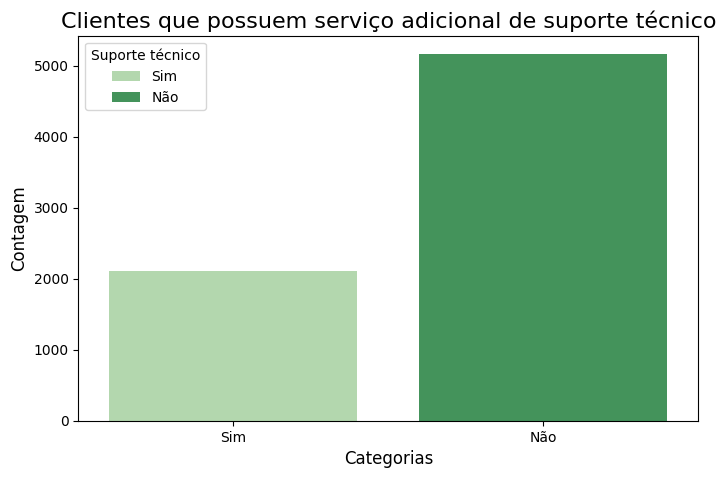

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='suporte_tecnico', palette='Greens', hue='suporte_tecnico', legend=True)

plt.title('Clientes que possuem serviço adicional de suporte técnico', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Suporte técnico')
plt.show()

______________________________________________________________

In [ ]:
df['internet.StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['internet.StreamingTV'].value_counts()

internet.StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'internet.StreamingTV': 'streaming_TV'})
df['streaming_TV'] = df['streaming_TV'].replace({'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Não'})

In [ ]:
df['streaming_TV'].unique()

array(['Sim', 'Não'], dtype=object)

In [ ]:
df['streaming_TV'].value_counts()

streaming_TV
Não    4477
Sim    2790
Name: count, dtype: int64

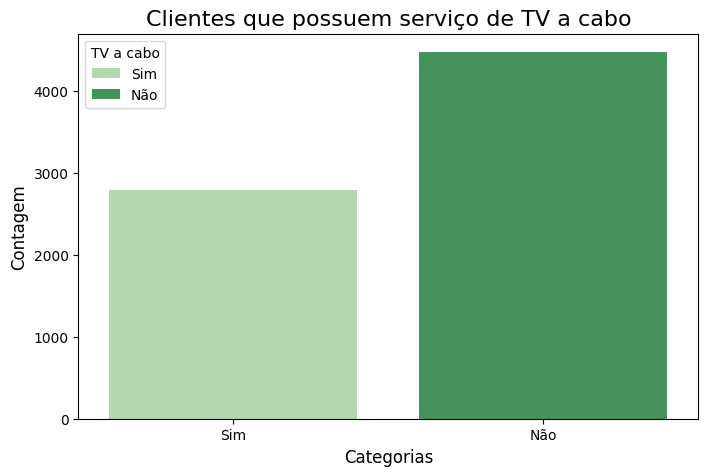

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='streaming_TV', palette='Greens', hue='streaming_TV', legend=True)

plt.title('Clientes que possuem serviço de TV a cabo', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='TV a cabo')

plt.show()

______________________________________________________________

In [ ]:
df['internet.StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['internet.StreamingMovies'].value_counts()

internet.StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'internet.StreamingMovies': 'streaming_filmes'})
df['streaming_filmes'] = df['streaming_filmes'].replace({'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Não'})

In [ ]:
df['streaming_filmes'].unique()

array(['Não', 'Sim'], dtype=object)

In [ ]:
df['streaming_filmes'].value_counts()

streaming_filmes
Não    4451
Sim    2816
Name: count, dtype: int64

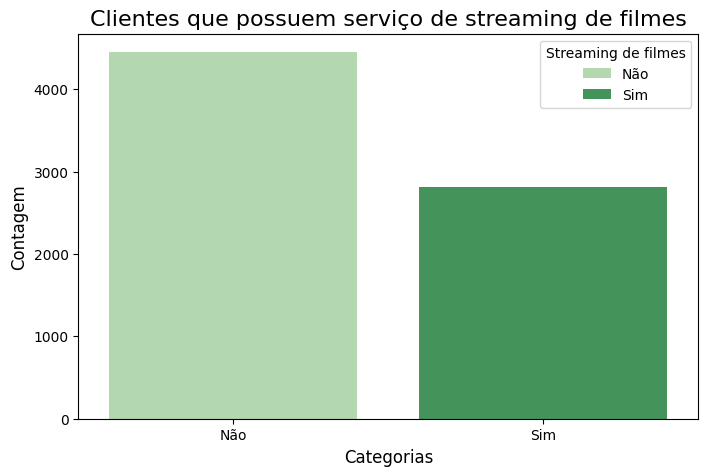

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='streaming_filmes', palette='Greens', hue='streaming_filmes', legend=True)

plt.title('Clientes que possuem serviço de streaming de filmes', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Streaming de filmes')

plt.show()

______________________________________________________________

In [ ]:
df['account.Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
df['account.Contract'].value_counts()

account.Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'account.Contract': 'tipo_contrato'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'Month-to-month': 'Mensal', 'One year': 'Anual', 'Two year': 'Bienal'})

In [ ]:
df['tipo_contrato'].unique()

array(['Anual', 'Mensal', 'Bienal'], dtype=object)

In [ ]:
df['tipo_contrato'].value_counts()

tipo_contrato
Mensal    4005
Bienal    1743
Anual     1519
Name: count, dtype: int64

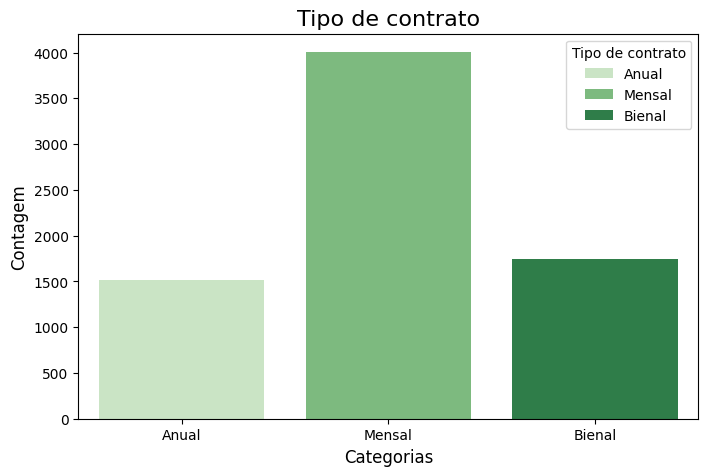

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='tipo_contrato', palette='Greens', hue='tipo_contrato', legend=True)

plt.title('Tipo de contrato', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Tipo de contrato')

plt.show()

______________________________________________________________

In [ ]:
df['account.PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['account.PaperlessBilling'].value_counts()

account.PaperlessBilling
Yes    4311
No     2956
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'account.PaperlessBilling': 'fatura_digital'})
df['fatura_digital'] = df['fatura_digital'].replace({'Yes': 'Sim', 'No': 'Não'})

In [ ]:
df['fatura_digital'].unique()

array(['Sim', 'Não'], dtype=object)

In [ ]:
df['fatura_digital'].value_counts()

fatura_digital
Sim    4311
Não    2956
Name: count, dtype: int64

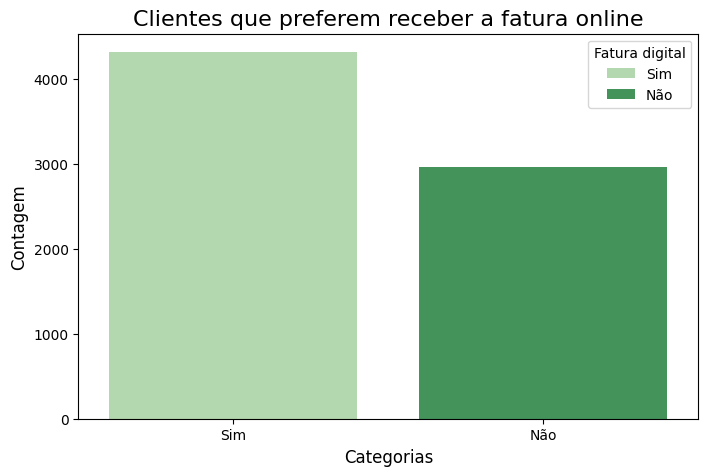

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='fatura_digital', palette='Greens', hue='fatura_digital', legend=True)

plt.title('Clientes que preferem receber a fatura online', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Fatura digital')

plt.show()

______________________________________________________________

In [ ]:
df['account.PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
df['account.PaymentMethod'].value_counts()

account.PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

In [ ]:
df = df.rename(columns={'account.PaymentMethod': 'meio_pagamento'})
df['meio_pagamento'] = df['meio_pagamento'].replace({'Electronic check': 'Cheque eletrônico', \
                                                     'Mailed check': 'Cheque via correio', \
                                                     'Bank transfer (automatic)': 'Transferência bancária (automático)', \
                                                     'Credit card (automatic)': 'Cartão de crédito (automático)'})

In [ ]:
df['meio_pagamento'].unique()

array(['Cheque via correio', 'Cheque eletrônico',
       'Cartão de crédito (automático)',
       'Transferência bancária (automático)'], dtype=object)

In [ ]:
df['meio_pagamento'].value_counts()

meio_pagamento
Cheque eletrônico                      2445
Cheque via correio                     1665
Transferência bancária (automático)    1589
Cartão de crédito (automático)         1568
Name: count, dtype: int64

/tmp/ipython-input-3833321461.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nomes)


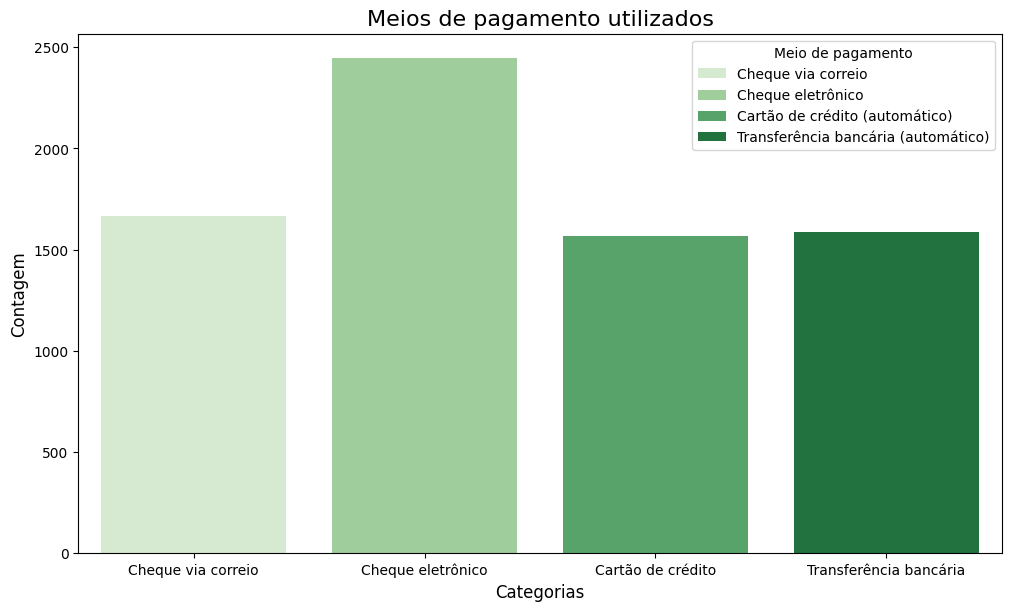

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

sns.countplot(data=df, x='meio_pagamento', palette='Greens', hue='meio_pagamento', legend=True)

plt.title('Meios de pagamento utilizados', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Meio de pagamento')
nomes = ['Cheque via correio', 'Cheque eletrônico', 'Cartão de crédito', 'Transferência bancária']
ax.set_xticklabels(nomes)

plt.show()

______________________________________________________________

In [ ]:
df['account.Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [ ]:
df['account.Charges.Monthly'].unique().max()

np.float64(118.75)

In [ ]:
df['account.Charges.Monthly'].unique().min()

np.float64(18.25)

In [ ]:
df.query('`account.Charges.Monthly` == " "')

Empty DataFrame
Columns: [id_cliente, cliente_ativo, genero, cliente_idoso, cliente_parceiro, cliente_dependentes, meses_contrato, linha_telefonica, multiplas_linhas, provedor_internet, seguranca_online, backup_online, protecao_dispositivo, suporte_tecnico, streaming_TV, streaming_filmes, tipo_contrato, fatura_digital, meio_pagamento, account.Charges.Monthly, account.Charges.Total]
Index: []

[0 rows x 21 columns]

In [ ]:
df = df.rename(columns={'account.Charges.Monthly': 'fatura_mensal'})

______________________________________________________________

In [ ]:
df['account.Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [ ]:
df['account.Charges.Total'].unique().max()

'999.9'

In [ ]:
df['account.Charges.Total'].unique().min()

' '

In [ ]:
# São os mesmos casos que tenure ou meses_contrato = 0. devem ser clientes novos que não completaram o primeiro mês de contrato

In [ ]:
df.query('`account.Charges.Total`== " "')

id_cliente cliente_ativo     genero cliente_idoso cliente_parceiro  \
975   1371-DWPAZ           Sim   Feminino           Não              Sim   
1775  2520-SGTTA           Sim   Feminino           Não              Sim   
1955  2775-SEFEE           Sim  Masculino           Não              Não   
2075  2923-ARZLG           Sim  Masculino           Não              Sim   
2232  3115-CZMZD           Sim  Masculino           Não              Não   
2308  3213-VVOLG           Sim  Masculino           Não              Sim   
2930  4075-WKNIU           Sim   Feminino           Não              Sim   
3134  4367-NUYAO           Sim  Masculino           Não              Sim   
3203  4472-LVYGI           Sim   Feminino           Não              Sim   
4169  5709-LVOEQ           Sim   Feminino           Não              Sim   
5599  7644-OMVMY           Sim  Masculino           Não              Sim   

     cliente_dependentes  meses_contrato linha_telefonica multiplas_linhas  \
975                  Sim               0              Não              Não   
1775                 Sim               0              Sim              Não   
1955                 Sim               0              Sim              Sim   
2075                 Sim               0              Sim              Não   
2232                 Sim               0              Sim              Não   
2308                 Sim               0              Sim              Sim   
2930                 Sim               0              Sim              Sim   
3134                 Sim               0              Sim              Sim   
3203                 Sim               0              Não              Não   
4169                 Sim               0              Sim              Não   
5599                 Sim               0              Sim              Não   

            provedor_internet  ... backup_online protecao_dispositivo  \
975                       DSL  ...           Sim                  Sim   
1775  Sem serviço de internet  ...           Não                  Não   
1955                      DSL  ...           Sim                  Não   
2075  Sem serviço de internet  ...           Não                  Não   
2232  Sem serviço de internet  ...           Não                  Não   
2308  Sem serviço de internet  ...           Não                  Não   
2930                      DSL  ...           Sim                  Sim   
3134  Sem serviço de internet  ...           Não                  Não   
3203                      DSL  ...           Não                  Sim   
4169                      DSL  ...           Sim                  Sim   
5599  Sem serviço de internet  ...           Não                  Não   

     suporte_tecnico streaming_TV streaming_filmes tipo_contrato  \
975              Sim          Sim              Não        Bienal   
1775             Não          Não              Não        Bienal   
1955             Sim          Não              Não        Bienal   
2075             Não          Não              Não         Anual   
2232             Não          Não              Não        Bienal   
2308             Não          Não              Não        Bienal   
2930             Sim          Sim              Não        Bienal   
3134             Não          Não              Não        Bienal   
3203             Sim          Sim              Não        Bienal   
4169             Não          Sim              Sim        Bienal   
5599             Não          Não              Não        Bienal   

     fatura_digital                       meio_pagamento fatura_mensal  \
975             Não       Cartão de crédito (automático)         56.05   
1775            Não                   Cheque via correio         20.00   
1955            Sim  Transferência bancária (automático)         61.90   
2075            Sim                   Cheque via correio         19.70   
2232            Não                   Cheque via correio         20.25   
2308            Nã

In [ ]:
df = df.rename(columns={'account.Charges.Total': 'custo_total'})

In [ ]:
df['custo_total'] = df['custo_total'].str.strip().replace('' , 0.0).astype(float)

In [ ]:
df.query('`custo_total`== " "')

Empty DataFrame
Columns: [id_cliente, cliente_ativo, genero, cliente_idoso, cliente_parceiro, cliente_dependentes, meses_contrato, linha_telefonica, multiplas_linhas, provedor_internet, seguranca_online, backup_online, protecao_dispositivo, suporte_tecnico, streaming_TV, streaming_filmes, tipo_contrato, fatura_digital, meio_pagamento, fatura_mensal, custo_total]
Index: []

[0 rows x 21 columns]

In [ ]:
df['custo_total'].unique().min()

np.float64(0.0)

#### contas_diarias

In [ ]:
# contas_diarias = valor da fatura mensal dividida pelo número de dias

In [ ]:
import numpy as np
lista1 = np.array(df['fatura_mensal'])
lista1

array([65.6 , 59.9 , 73.9 , ..., 50.3 , 67.85, 59.  ])

In [ ]:
resultado = []
resultado = np.round(lista1 / 30, 2)
resultado

array([2.19, 2.  , 2.46, ..., 1.68, 2.26, 1.97])

In [ ]:
df['contas_diarias'] = resultado

In [ ]:
df.head()

id_cliente cliente_ativo     genero cliente_idoso cliente_parceiro  \
0  0002-ORFBO           Sim   Feminino           Não              Sim   
1  0003-MKNFE           Sim  Masculino           Não              Não   
2  0004-TLHLJ           Não  Masculino           Não              Não   
3  0011-IGKFF           Não  Masculino           Sim              Sim   
4  0013-EXCHZ           Não   Feminino           Sim              Sim   

  cliente_dependentes  meses_contrato linha_telefonica multiplas_linhas  \
0                 Sim               9              Sim              Não   
1                 Não               9              Sim              Sim   
2                 Não               4              Sim              Não   
3                 Não              13              Sim              Não   
4                 Não               3              Sim              Não   

  provedor_internet  ... protecao_dispositivo suporte_tecnico streaming_TV  \
0               DSL  ...                  Não             Sim          Sim   
1               DSL  ...                  Não             Não          Não   
2      Fibra óptica  ...                  Sim             Não          Não   
3      Fibra óptica  ...                  Sim             Não          Sim   
4      Fibra óptica  ...                  Não             Sim          Sim   

  streaming_filmes tipo_contrato fatura_digital      meio_pagamento  \
0              Não         Anual            Sim  Cheque via correio   
1              Sim        Mensal            Não  Cheque via correio   
2              Não        Mensal            Sim   Cheque eletrônico   
3              Sim        Mensal            Sim   Cheque eletrônico   
4              Não        Mensal            Sim  Cheque via correio   

  fatura_mensal custo_total  contas_diarias  
0          65.6      593.30            2.19  
1          59.9      542.40            2.00  
2          73.9      280.85            2.46  
3          98.0     1237.85            3.27  
4          83.9      267.40            2.80  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7267 non-null   object 
 1   cliente_ativo         7267 non-null   object 
 2   genero                7267 non-null   object 
 3   cliente_idoso         7267 non-null   object 
 4   cliente_parceiro      7267 non-null   object 
 5   cliente_dependentes   7267 non-null   object 
 6   meses_contrato        7267 non-null   int64  
 7   linha_telefonica      7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   provedor_internet     7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  streaming_TV          7267 non-null   object 
 15  streaming_filmes     

In [ ]:
resultado = df.query('`linha_telefonica` == "Não" & `provedor_internet` == "Não"')

In [ ]:
resultado

Empty DataFrame
Columns: [id_cliente, cliente_ativo, genero, cliente_idoso, cliente_parceiro, cliente_dependentes, meses_contrato, linha_telefonica, multiplas_linhas, provedor_internet, seguranca_online, backup_online, protecao_dispositivo, suporte_tecnico, streaming_TV, streaming_filmes, tipo_contrato, fatura_digital, meio_pagamento, fatura_mensal, custo_total, contas_diarias]
Index: []

[0 rows x 22 columns]

In [ ]:
resultado2 = df.query('`linha_telefonica` == "Sim" & `provedor_internet` == "Sim"')
resultado2

Empty DataFrame
Columns: [id_cliente, cliente_ativo, genero, cliente_idoso, cliente_parceiro, cliente_dependentes, meses_contrato, linha_telefonica, multiplas_linhas, provedor_internet, seguranca_online, backup_online, protecao_dispositivo, suporte_tecnico, streaming_TV, streaming_filmes, tipo_contrato, fatura_digital, meio_pagamento, fatura_mensal, custo_total, contas_diarias]
Index: []

[0 rows x 22 columns]

#📊 Carga e análise

In [ ]:
# Criação de conjunto de dados excluindo valores vazios/desconhecidos : 7043 registros

In [ ]:
base = df.query('`cliente_ativo` == "Não" | `cliente_ativo` == "Sim"')

In [ ]:
base.shape

(7043, 22)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7043 non-null   object 
 1   cliente_ativo         7043 non-null   object 
 2   genero                7043 non-null   object 
 3   cliente_idoso         7043 non-null   object 
 4   cliente_parceiro      7043 non-null   object 
 5   cliente_dependentes   7043 non-null   object 
 6   meses_contrato        7043 non-null   int64  
 7   linha_telefonica      7043 non-null   object 
 8   multiplas_linhas      7043 non-null   object 
 9   provedor_internet     7043 non-null   object 
 10  seguranca_online      7043 non-null   object 
 11  backup_online         7043 non-null   object 
 12  protecao_dispositivo  7043 non-null   object 
 13  suporte_tecnico       7043 non-null   object 
 14  streaming_TV          7043 non-null   object 
 15  streaming_filmes      7043

In [ ]:
base['cliente_ativo'].value_counts()

cliente_ativo
Sim    5174
Não    1869
Name: count, dtype: int64

In [ ]:
base['cliente_ativo'].describe()

count     7043
unique       2
top        Sim
freq      5174
Name: cliente_ativo, dtype: object

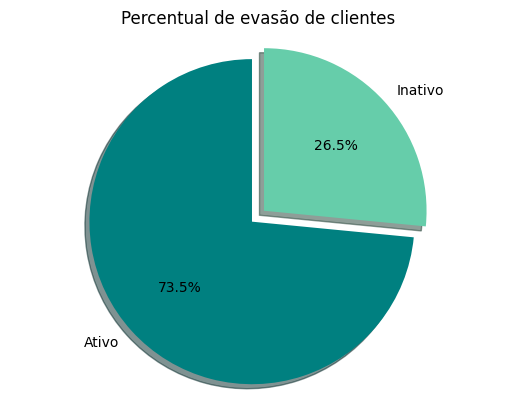

In [ ]:
import matplotlib.pyplot as plt


labels = 'Ativo', 'Inativo'
sizes = [5174, 1869]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Percentual de evasão de clientes')

plt.show()

In [ ]:
base['genero'].describe()

count          7043
unique            2
top       Masculino
freq           3555
Name: genero, dtype: object

In [ ]:
base['genero'].value_counts()

genero
Masculino    3555
Feminino     3488
Name: count, dtype: int64

In [ ]:
base.groupby('cliente_ativo')['genero'].describe()

count unique        top  freq
cliente_ativo                              
Não            1869      2   Feminino   939
Sim            5174      2  Masculino  2625

In [ ]:
base.groupby('cliente_ativo')['genero'].value_counts()

cliente_ativo  genero   
Não            Feminino      939
               Masculino     930
Sim            Masculino    2625
               Feminino     2549
Name: count, dtype: int64

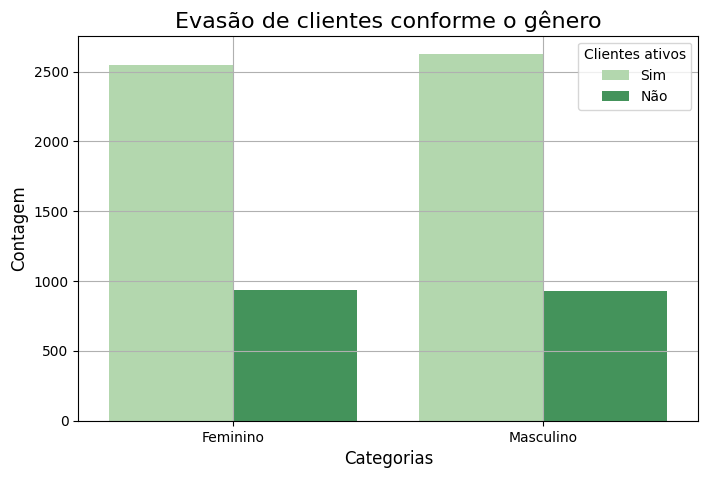

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='genero', palette='Greens', hue='cliente_ativo', legend=True)

plt.title('Evasão de clientes conforme o gênero', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

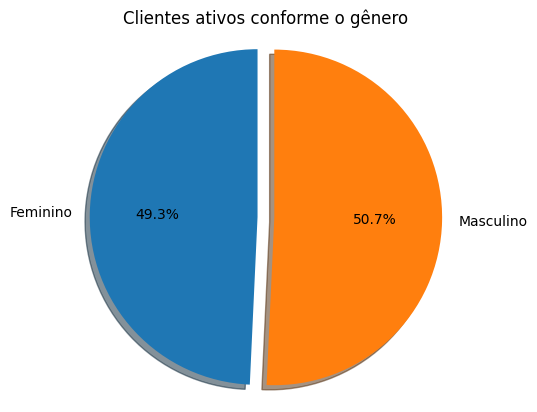

In [ ]:
# clientes ativos
import matplotlib.pyplot as plt
labels = 'Feminino', 'Masculino'
sizes = [2549, 2625]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes ativos conforme o gênero')

plt.show()

In [ ]:
base.groupby('cliente_ativo')['genero'].value_counts()

cliente_ativo  genero   
Não            Feminino      939
               Masculino     930
Sim            Masculino    2625
               Feminino     2549
Name: count, dtype: int64

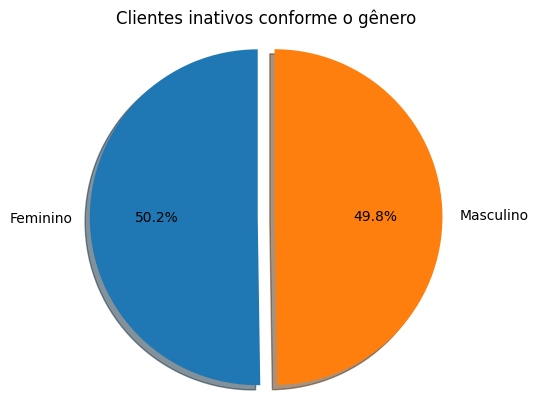

In [ ]:
#inativo
import matplotlib.pyplot as plt
labels = 'Feminino', 'Masculino'
sizes = [939, 930]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes inativos conforme o gênero')

plt.show()

In [ ]:
base['cliente_idoso'].describe()

count     7043
unique       2
top        Não
freq      5901
Name: cliente_idoso, dtype: object

In [ ]:
base.groupby('cliente_ativo')['cliente_idoso'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1393
Sim            5174      2  Não  4508

In [ ]:
base.groupby('cliente_ativo')['cliente_idoso'].value_counts()

cliente_ativo  cliente_idoso
Não            Não              1393
               Sim               476
Sim            Não              4508
               Sim               666
Name: count, dtype: int64

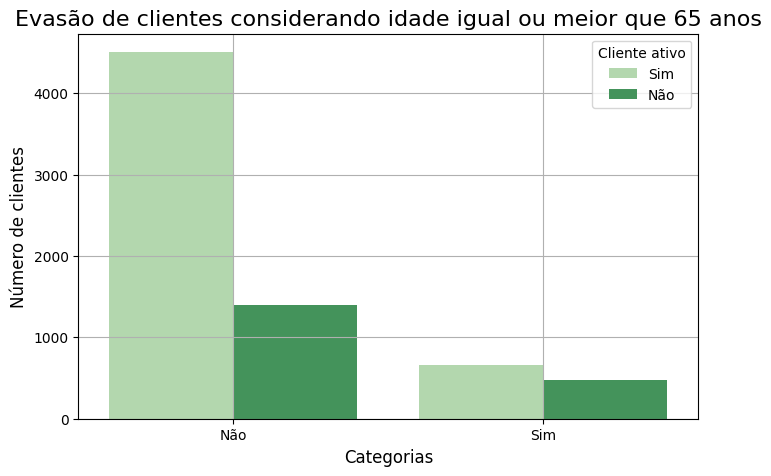

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='cliente_idoso', palette='Greens', hue='cliente_ativo', legend=True)

plt.title('Evasão de clientes considerando idade igual ou meior que 65 anos', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Cliente ativo')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['cliente_idoso'].value_counts()

cliente_ativo  cliente_idoso
Não            Não              1393
               Sim               476
Sim            Não              4508
               Sim               666
Name: count, dtype: int64

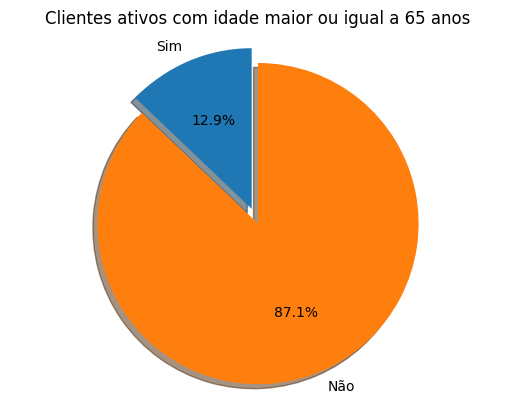

In [ ]:
#ativo
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [666, 4508]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes ativos com idade maior ou igual a 65 anos')

plt.show()

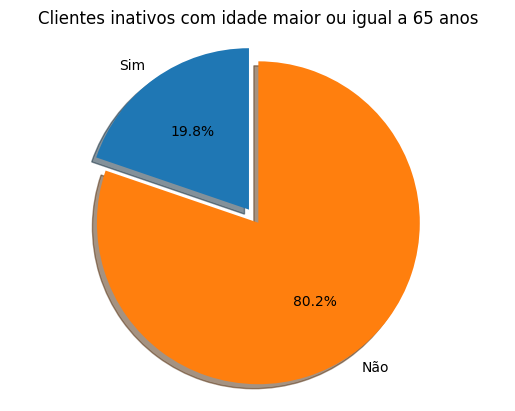

In [ ]:
#Inativo
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [476, 1933]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes inativos com idade maior ou igual a 65 anos')

plt.show()

In [ ]:
base['cliente_parceiro'].describe()

count     7043
unique       2
top        Não
freq      3641
Name: cliente_parceiro, dtype: object

In [ ]:
base.groupby('cliente_ativo')['cliente_parceiro'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1200
Sim            5174      2  Sim  2733

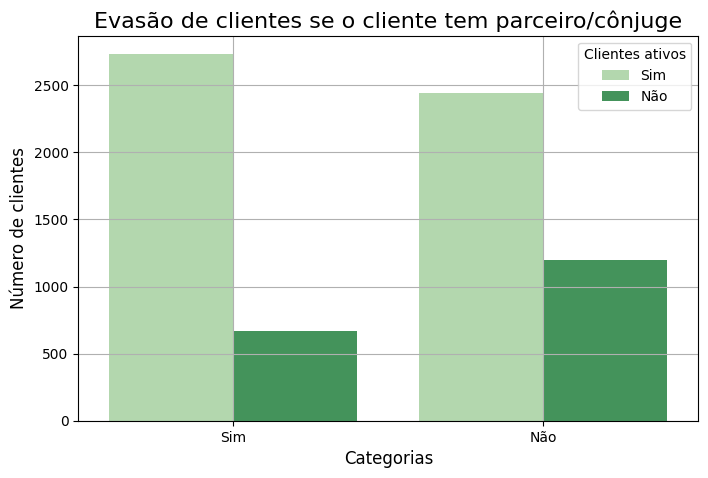

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='cliente_parceiro', palette='Greens', hue='cliente_ativo', legend=True)

plt.title('Evasão de clientes se o cliente tem parceiro/cônjuge', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

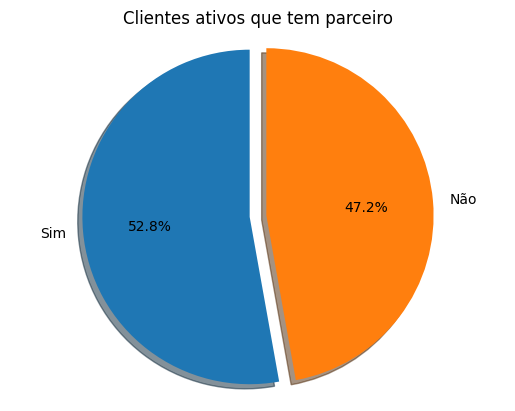

In [ ]:
#ativo
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [2733, 2441]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes ativos que tem parceiro')

plt.show()

In [ ]:
base.groupby('cliente_ativo')['cliente_parceiro'].value_counts()

cliente_ativo  cliente_parceiro
Não            Não                 1200
               Sim                  669
Sim            Sim                 2733
               Não                 2441
Name: count, dtype: int64

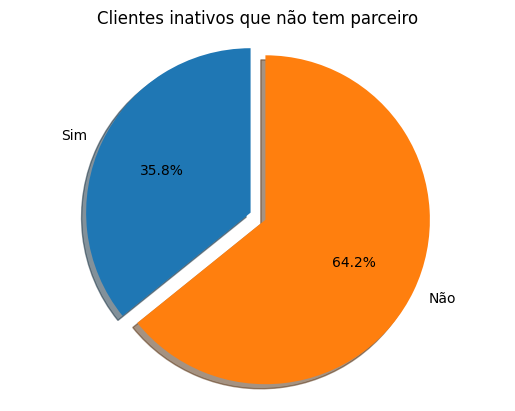

In [ ]:

import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [669, 1200]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes inativos que não tem parceiro')

plt.show()

In [ ]:
base['cliente_dependentes'].describe()

count     7043
unique       2
top        Não
freq      4933
Name: cliente_dependentes, dtype: object

In [ ]:
base['cliente_dependentes'].value_counts()

cliente_dependentes
Não    4933
Sim    2110
Name: count, dtype: int64

In [ ]:
base.groupby('cliente_ativo')['cliente_dependentes'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1543
Sim            5174      2  Não  3390

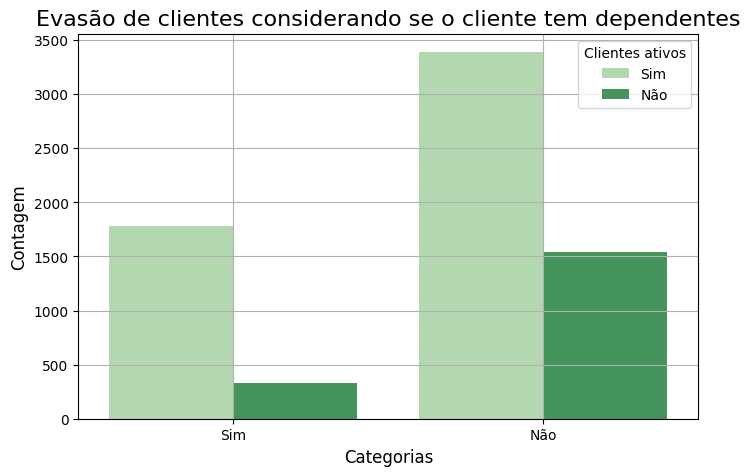

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='cliente_dependentes', palette='Greens', hue='cliente_ativo', legend=True)

plt.title('Evasão de clientes considerando se o cliente tem dependentes', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

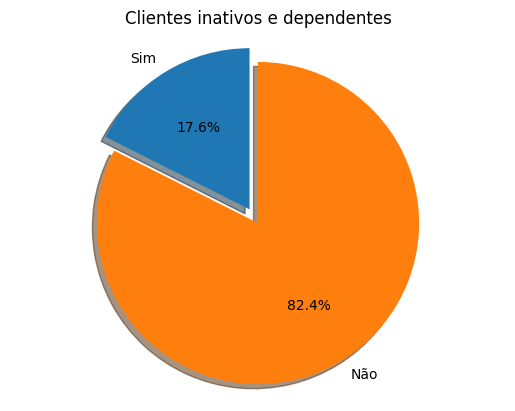

In [ ]:
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [329, 1543]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes inativos e dependentes')

plt.show()

In [ ]:
base.groupby('cliente_ativo')['cliente_dependentes'].value_counts()

cliente_ativo  cliente_dependentes
Não            Não                    1543
               Sim                     326
Sim            Não                    3390
               Sim                    1784
Name: count, dtype: int64

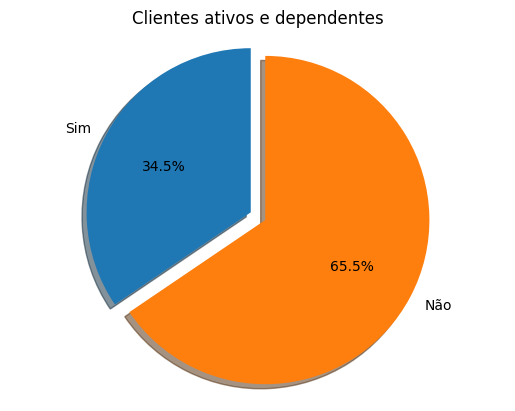

In [ ]:
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [1784, 3390]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes ativos e dependentes')

plt.show()

In [ ]:
base['meses_contrato'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: meses_contrato, dtype: float64

In [ ]:
select_sim = base.query('`cliente_ativo`== "Sim"')

In [ ]:
select_nao = base.query('`cliente_ativo`== "Não"')

In [ ]:
select_nao.groupby('cliente_dependentes')['tipo_contrato'].value_counts()

cliente_dependentes  tipo_contrato
Não                  Mensal           1396
                     Anual             117
                     Bienal             30
Sim                  Mensal            259
                     Anual              49
                     Bienal             18
Name: count, dtype: int64

In [ ]:
nao = 1396 + 117 + 30
sim = 259 + 49 + 18

In [ ]:
select_sim.groupby('cliente_dependentes')['tipo_contrato'].value_counts()

cliente_dependentes  tipo_contrato
Não                  Mensal           1690
                     Bienal            875
                     Anual             825
Sim                  Bienal            772
                     Mensal            530
                     Anual             482
Name: count, dtype: int64

In [ ]:
base.groupby('cliente_ativo')['meses_contrato'].describe()

count       mean        std  min   25%   50%   75%   max
cliente_ativo                                                           
Não            1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
Sim            5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0

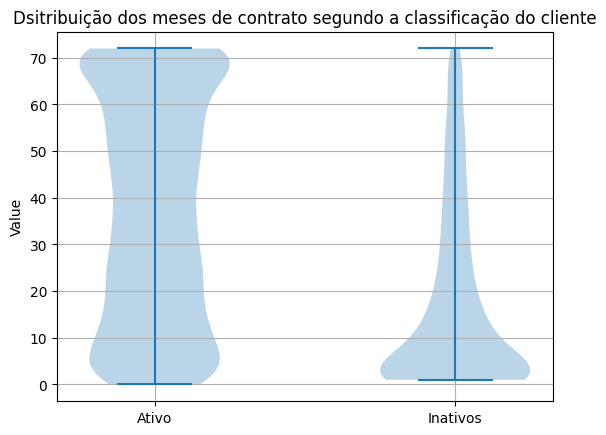

In [ ]:

dados = [select_sim['meses_contrato'], select_nao['meses_contrato']]

# Create the plot
fig, ax = plt.subplots()
ax.violinplot(dados)

# Add labels and title
ax.set_xticks([1, 2])
ax.set_xticklabels([ 'Ativo', 'Inativos'])
ax.set_ylabel('Value')
ax.set_title('Dsitribuição dos meses de contrato segundo a classificação do cliente')
ax.grid()

plt.show()

In [ ]:
base['linha_telefonica'].describe()

count     7043
unique       2
top        Sim
freq      6361
Name: linha_telefonica, dtype: object

In [ ]:
base.groupby('cliente_ativo')['linha_telefonica'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Sim  1699
Sim            5174      2  Sim  4662

In [ ]:
base.groupby('cliente_ativo')['linha_telefonica'].value_counts()

cliente_ativo  linha_telefonica
Não            Sim                 1699
               Não                  170
Sim            Sim                 4662
               Não                  512
Name: count, dtype: int64

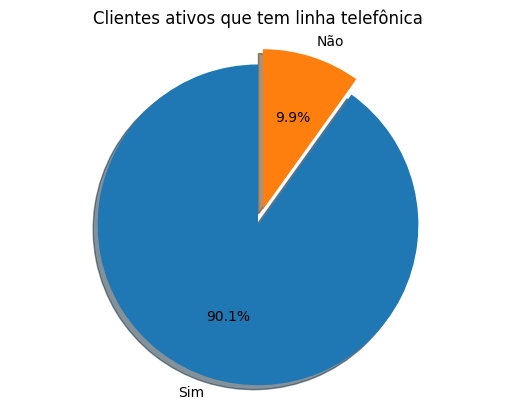

In [ ]:
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [4662, 512]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes ativos que tem linha telefônica')

plt.show()

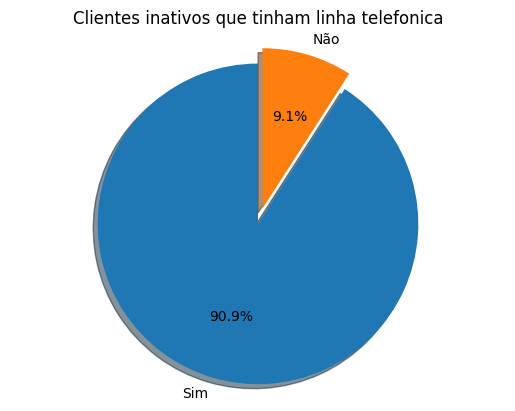

In [ ]:
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [1699, 170]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes inativos que tinham linha telefonica')

plt.show()

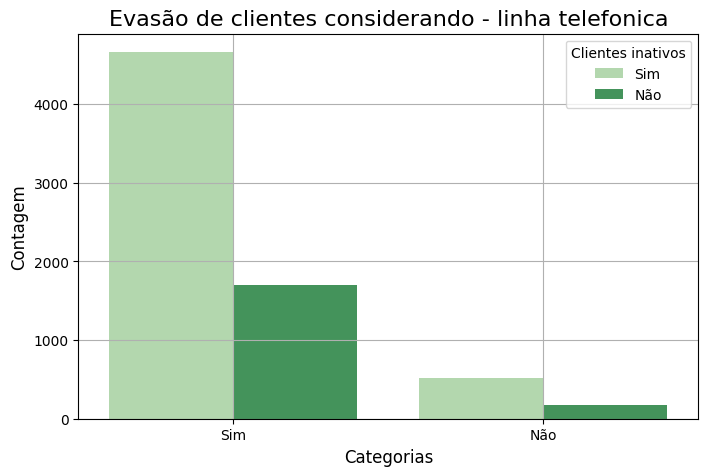

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='linha_telefonica', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes considerando - linha telefonica', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes inativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['multiplas_linhas'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1019
Sim            5174      2  Não  3053

In [ ]:
base.groupby('cliente_ativo')['multiplas_linhas'].value_counts()

cliente_ativo  multiplas_linhas
Não            Não                 1019
               Sim                  850
Sim            Não                 3053
               Sim                 2121
Name: count, dtype: int64

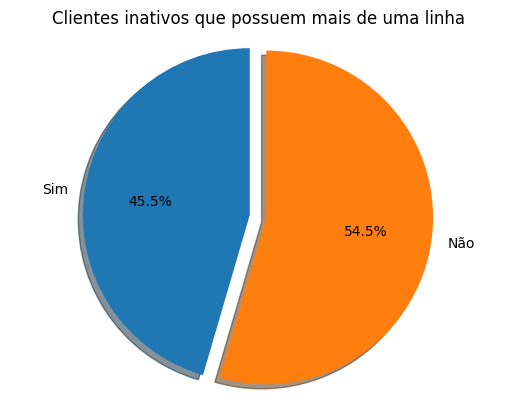

In [ ]:
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [850, 1019]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes inativos que possuem mais de uma linha')

plt.show()

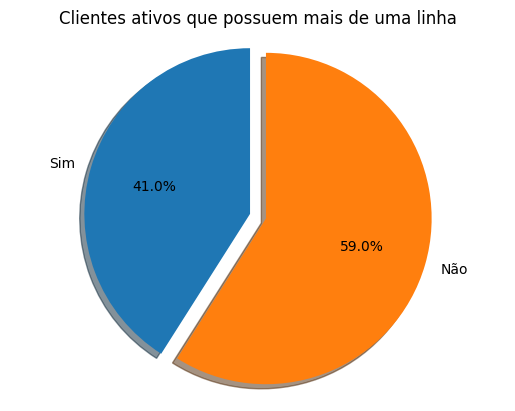

In [ ]:
import matplotlib.pyplot as plt
labels = 'Sim', 'Não'
sizes = [2121, 3053]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Clientes ativos que possuem mais de uma linha')

plt.show()

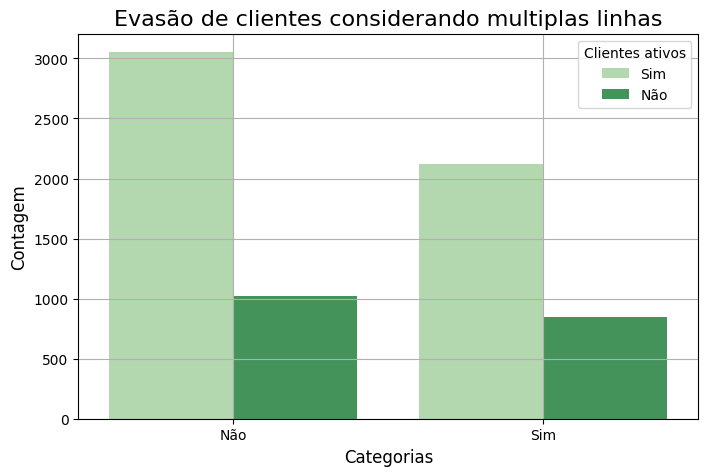

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='multiplas_linhas', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes considerando multiplas linhas', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['provedor_internet'].describe()

count unique           top  freq
cliente_ativo                                 
Não            1869      3  Fibra óptica  1297
Sim            5174      3           DSL  1962

In [ ]:
base.groupby('cliente_ativo')['provedor_internet'].value_counts()

cliente_ativo  provedor_internet      
Não            Fibra óptica               1297
               DSL                         459
               Sem serviço de internet     113
Sim            DSL                        1962
               Fibra óptica               1799
               Sem serviço de internet    1413
Name: count, dtype: int64

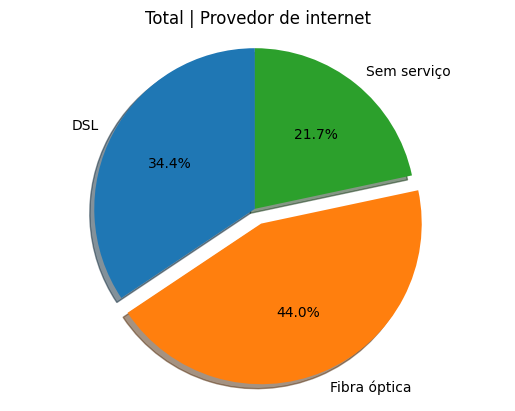

In [ ]:
import matplotlib.pyplot as plt
labels = 'DSL', 'Fibra óptica', 'Sem serviço'
sizes = [(459 + 1962), (1297 + 1799), (113 + 1413)]
explode = (0, 0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Total | Provedor de internet')

plt.show()

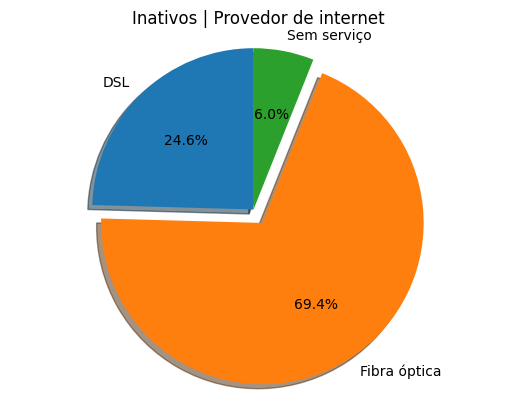

In [ ]:
import matplotlib.pyplot as plt
labels = 'DSL', 'Fibra óptica', 'Sem serviço'
sizes = [459, 1297, 113]
explode = (0, 0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Inativos | Provedor de internet')

plt.show()

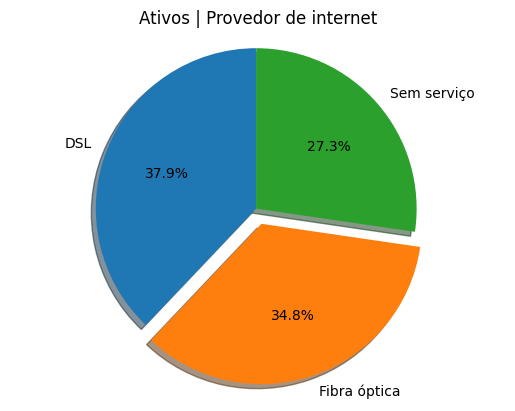

In [ ]:
import matplotlib.pyplot as plt
labels = 'DSL', 'Fibra óptica', 'Sem serviço'
sizes = [1962, 1799, 1413]
explode = (0, 0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Ativos | Provedor de internet')

plt.show()

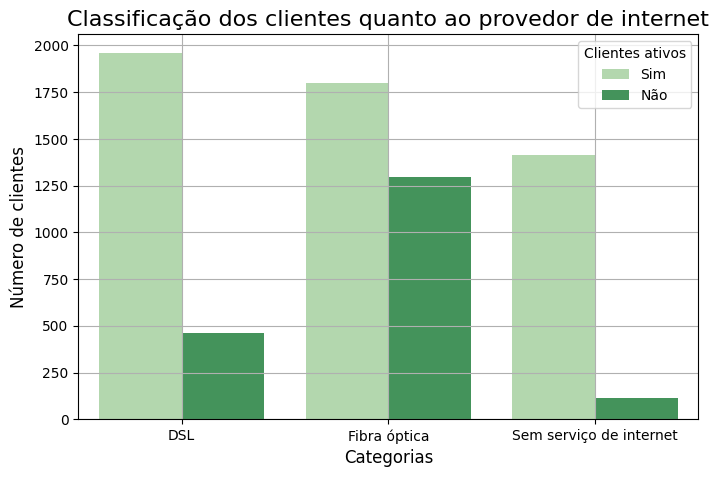

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='provedor_internet', palette='Greens', hue='cliente_ativo')

plt.title('Classificação dos clientes quanto ao provedor de internet', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')[['provedor_internet', 'linha_telefonica']].value_counts()

cliente_ativo  provedor_internet        linha_telefonica
Não            Fibra óptica             Sim                 1297
               DSL                      Sim                  289
                                        Não                  170
               Sem serviço de internet  Sim                  113
Sim            Fibra óptica             Sim                 1799
               DSL                      Sim                 1450
               Sem serviço de internet  Sim                 1413
               DSL                      Não                  512
Name: count, dtype: int64

In [ ]:
base.groupby('cliente_ativo')['seguranca_online'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1574
Sim            5174      2  Não  3450

In [ ]:
base.groupby('cliente_ativo')['seguranca_online'].value_counts()

cliente_ativo  seguranca_online
Não            Não                 1574
               Sim                  295
Sim            Não                 3450
               Sim                 1724
Name: count, dtype: int64

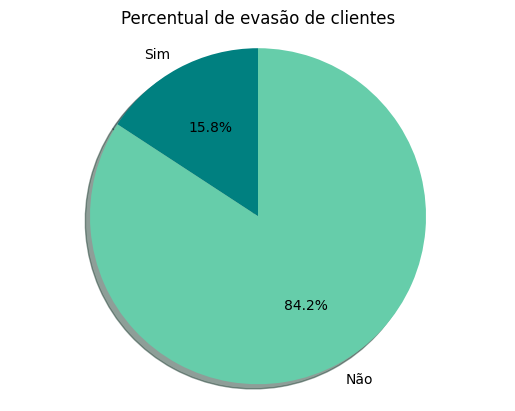

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [295, 1574]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes inativos | Segurança online')

plt.show()

In [ ]:
base.groupby('cliente_ativo')['seguranca_online'].value_counts()

cliente_ativo  seguranca_online
Não            Não                 1574
               Sim                  295
Sim            Não                 3450
               Sim                 1724
Name: count, dtype: int64

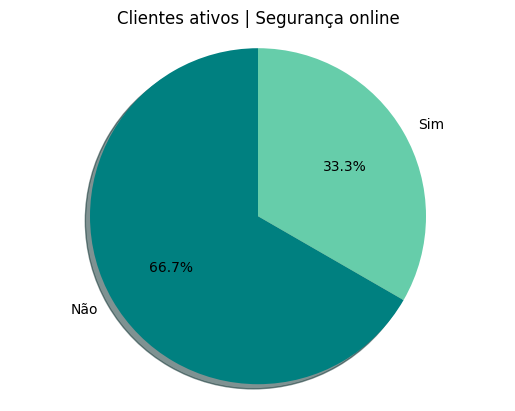

In [ ]:
import matplotlib.pyplot as plt


labels = 'Não', 'Sim'
sizes = [3450, 1724]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes ativos | Segurança online')

plt.show()

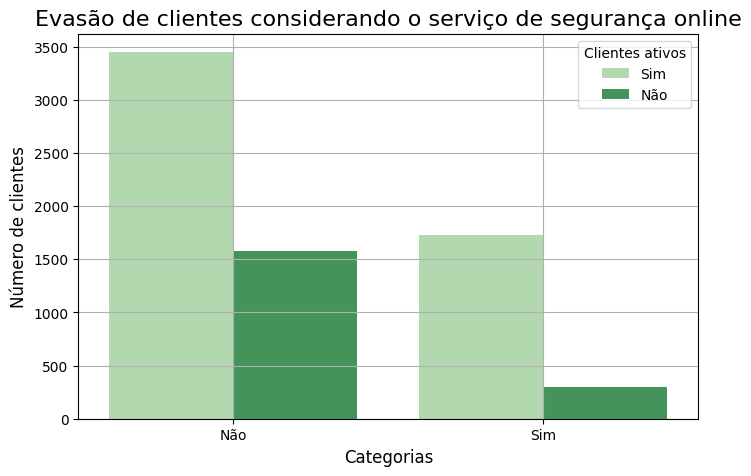

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='seguranca_online', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes considerando o serviço de segurança online', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['backup_online'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1346
Sim            5174      2  Não  3268

In [ ]:
base.groupby('cliente_ativo')['backup_online'].value_counts()

cliente_ativo  backup_online
Não            Não              1346
               Sim               523
Sim            Não              3268
               Sim              1906
Name: count, dtype: int64

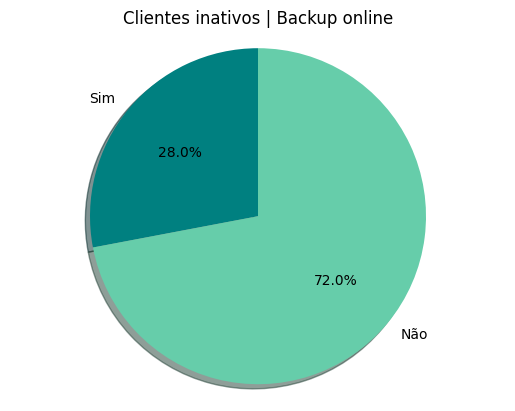

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [523, 1346]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes inativos | Backup online')

plt.show()

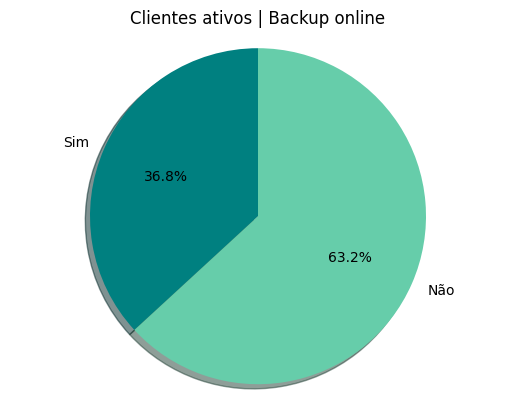

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [1906, 3268]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes ativos | Backup online')

plt.show()

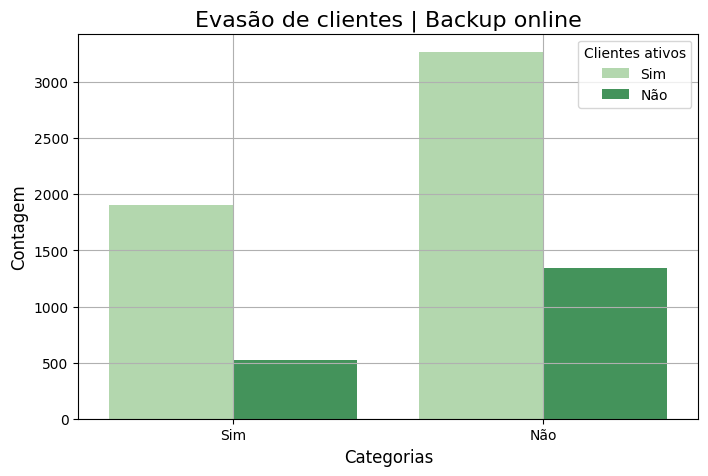

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='backup_online', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes | Backup online', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['protecao_dispositivo'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1324
Sim            5174      2  Não  3297

In [ ]:
base.groupby('cliente_ativo')['protecao_dispositivo'].value_counts()

cliente_ativo  protecao_dispositivo
Não            Não                     1324
               Sim                      545
Sim            Não                     3297
               Sim                     1877
Name: count, dtype: int64

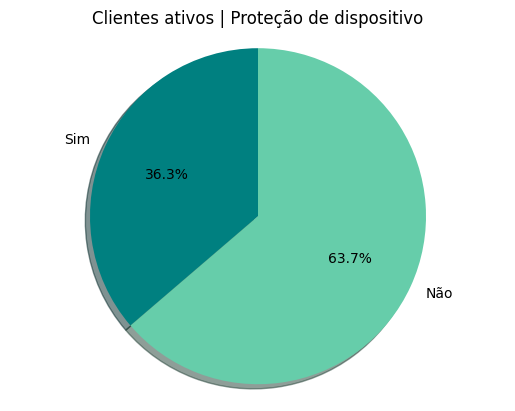

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [1877, 3297]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes ativos | Proteção de dispositivo')

plt.show()

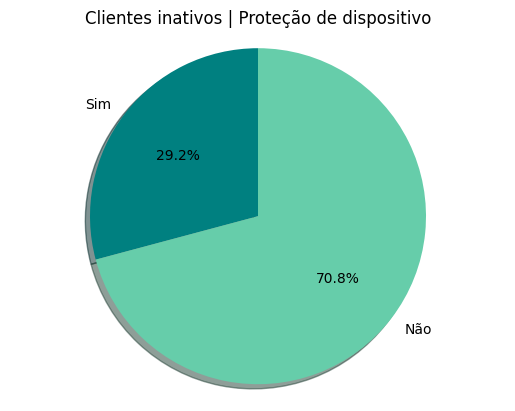

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [545, 1324]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes inativos | Proteção de dispositivo')
plt.show()

In [ ]:
base.groupby('cliente_ativo')['suporte_tecnico'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1559
Sim            5174      2  Não  3440

In [ ]:
base.groupby('cliente_ativo')['suporte_tecnico'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1559
Sim            5174      2  Não  3440

In [ ]:
base.groupby('cliente_ativo')['suporte_tecnico'].value_counts()

cliente_ativo  suporte_tecnico
Não            Não                1559
               Sim                 310
Sim            Não                3440
               Sim                1734
Name: count, dtype: int64

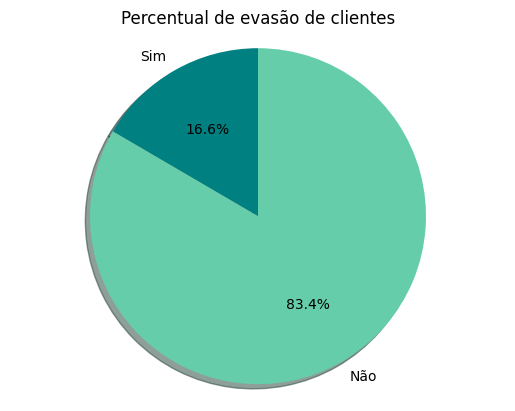

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [310, 1559]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes inativos | Suporte técnico')

plt.show()

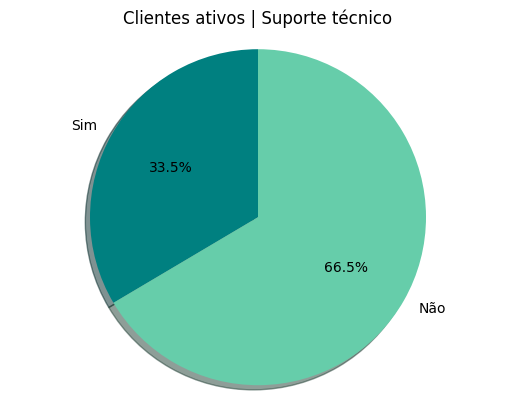

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [1734, 3440]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes ativos | Suporte técnico')

plt.show()

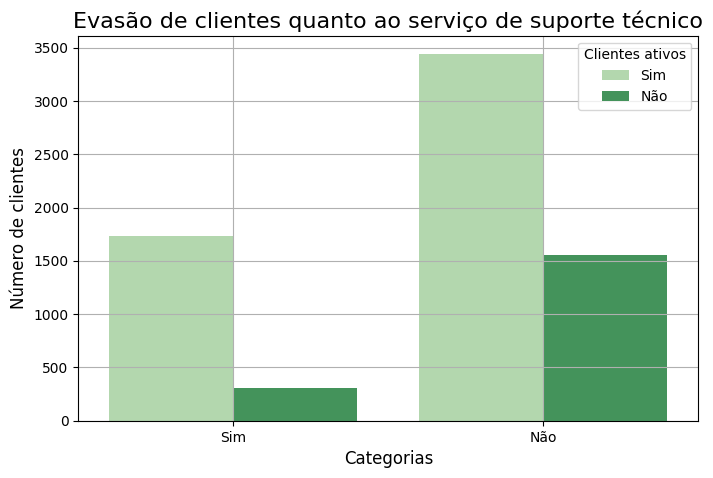

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='suporte_tecnico', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes quanto ao serviço de suporte técnico', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['streaming_TV'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1055
Sim            5174      2  Não  3281

In [ ]:
base.groupby('cliente_ativo')['streaming_TV'].value_counts()

cliente_ativo  streaming_TV
Não            Não             1055
               Sim              814
Sim            Não             3281
               Sim             1893
Name: count, dtype: int64

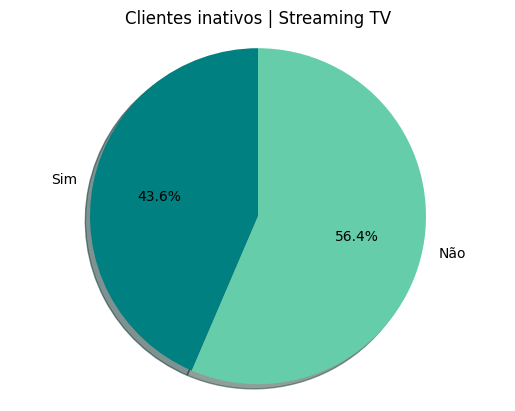

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [814, 1055]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes inativos | Streaming TV')

plt.show()

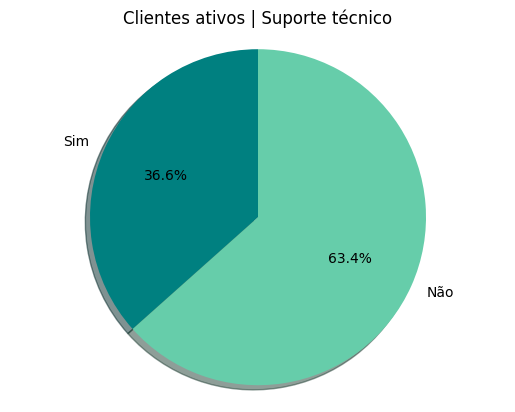

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [1893, 3281]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes ativos | Suporte técnico')

plt.show()

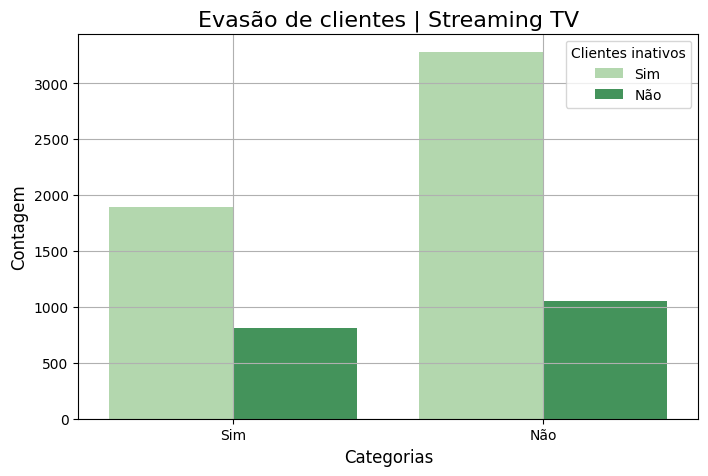

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='streaming_TV', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes | Streaming TV', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes inativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['streaming_filmes'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Não  1051
Sim            5174      2  Não  3260

In [ ]:
base.groupby('cliente_ativo')['streaming_filmes'].value_counts()

cliente_ativo  streaming_filmes
Não            Não                 1051
               Sim                  818
Sim            Não                 3260
               Sim                 1914
Name: count, dtype: int64

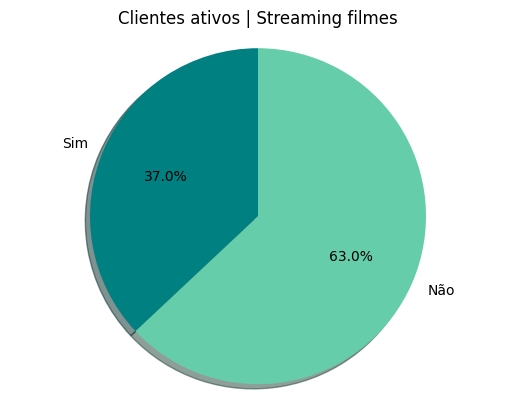

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [1914, 3260]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Clientes ativos | Streaming filmes')

plt.show()

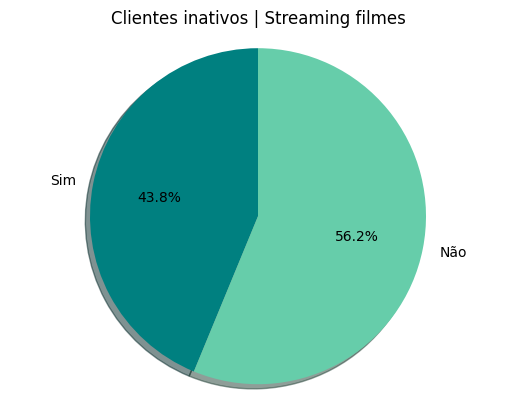

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [818, 1051]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Clientes inativos | Streaming filmes')

plt.show()

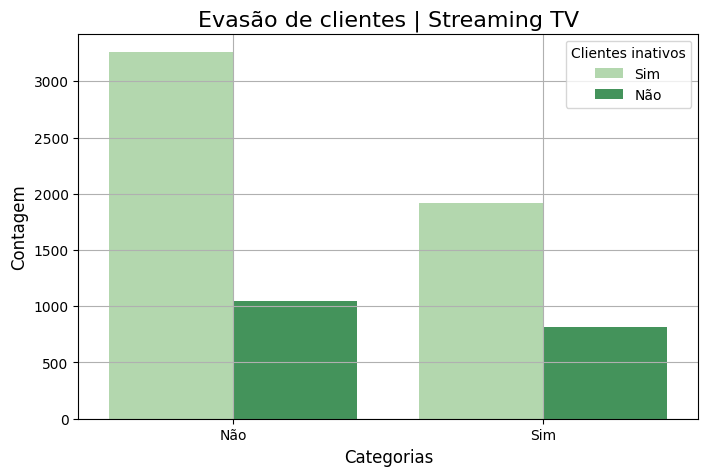

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='streaming_filmes', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes | Streaming TV', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes inativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['tipo_contrato'].describe()

count unique     top  freq
cliente_ativo                           
Não            1869      3  Mensal  1655
Sim            5174      3  Mensal  2220

In [ ]:
base.groupby('cliente_ativo')['tipo_contrato'].value_counts()

cliente_ativo  tipo_contrato
Não            Mensal           1655
               Anual             166
               Bienal             48
Sim            Mensal           2220
               Bienal           1647
               Anual            1307
Name: count, dtype: int64

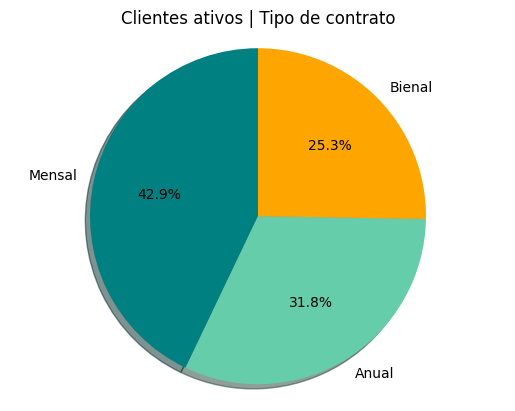

In [ ]:
import matplotlib.pyplot as plt


labels = 'Mensal', 'Anual', 'Bienal'
sizes = [2220, 1647, 1307]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes ativos | Tipo de contrato')

plt.show()

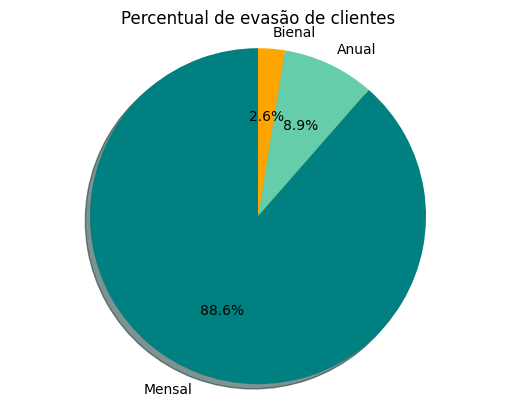

In [ ]:
import matplotlib.pyplot as plt


labels = 'Mensal', 'Anual', 'Bienal'
sizes = [1655, 166, 48]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa', 'orange'])
ax1.axis('equal')
plt.title('Clientes inativos | Tipo de contrato')

plt.show()

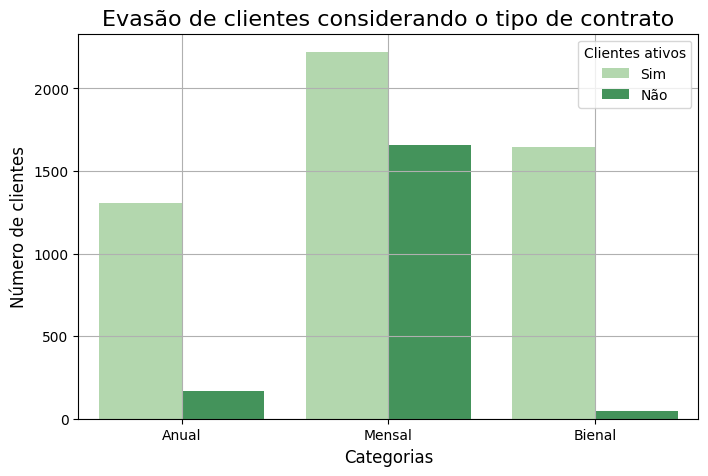

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='tipo_contrato', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes considerando o tipo de contrato', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['fatura_digital'].describe()

count unique  top  freq
cliente_ativo                        
Não            1869      2  Sim  1400
Sim            5174      2  Sim  2771

In [ ]:
base.groupby('cliente_ativo')['fatura_digital'].value_counts()

cliente_ativo  fatura_digital
Não            Sim               1400
               Não                469
Sim            Sim               2771
               Não               2403
Name: count, dtype: int64

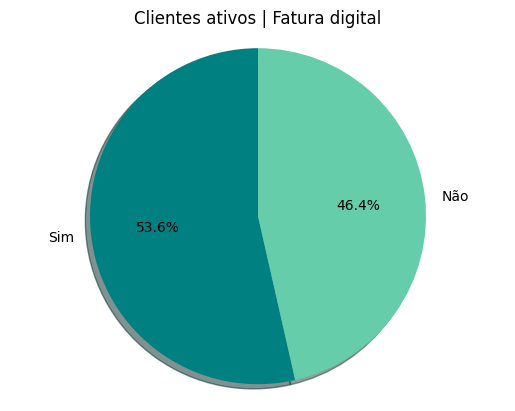

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [2771, 2403]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Clientes ativos | Fatura digital')

plt.show()

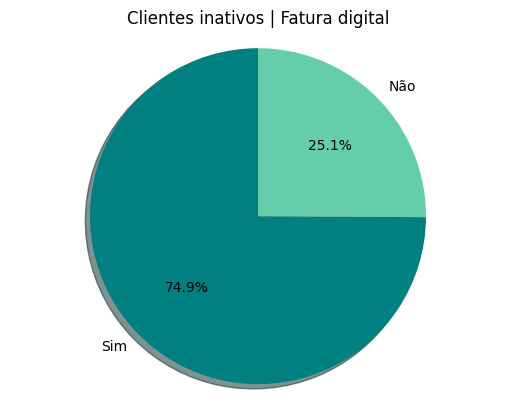

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [1400, 469]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Clientes inativos | Fatura digital')

plt.show()

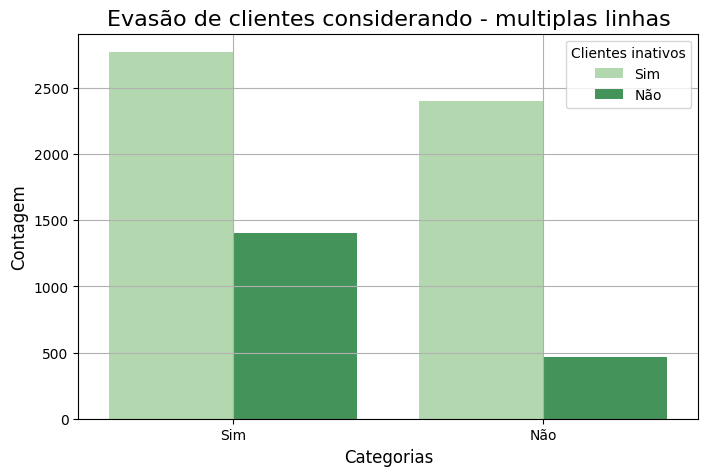

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='fatura_digital', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes | Fatura digital', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes inativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['meio_pagamento'].describe()

count unique                 top  freq
cliente_ativo                                       
Não            1869      4   Cheque eletrônico  1071
Sim            5174      4  Cheque via correio  1304

In [ ]:
base.groupby('cliente_ativo')['meio_pagamento'].value_counts()

cliente_ativo  meio_pagamento                     
Não            Cheque eletrônico                      1071
               Cheque via correio                      308
               Transferência bancária (automático)     258
               Cartão de crédito (automático)          232
Sim            Cheque via correio                     1304
               Cheque eletrônico                      1294
               Cartão de crédito (automático)         1290
               Transferência bancária (automático)    1286
Name: count, dtype: int64

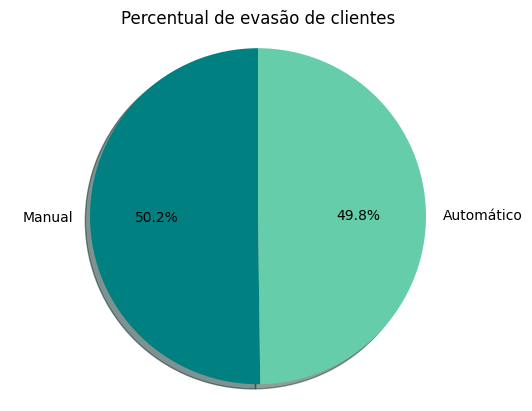

In [ ]:
import matplotlib.pyplot as plt


labels = 'Manual', 'Automático'
sizes = [(1304 + 1294), (1290 + 1286)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Clientes ativos | Meio de pagamento')

plt.show()

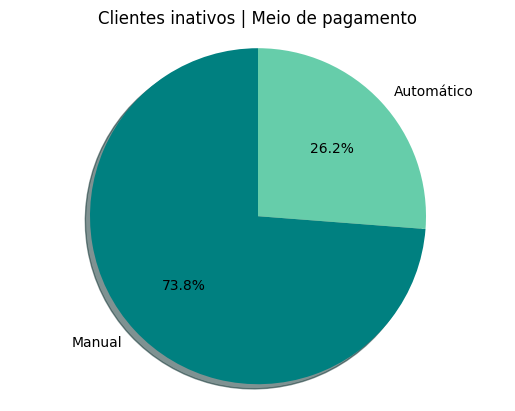

In [ ]:
import matplotlib.pyplot as plt


labels = 'Manual', 'Automático'
sizes = [(1071 + 308), (258 + 232)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Clientes inativos | Meio de pagamento')

plt.show()

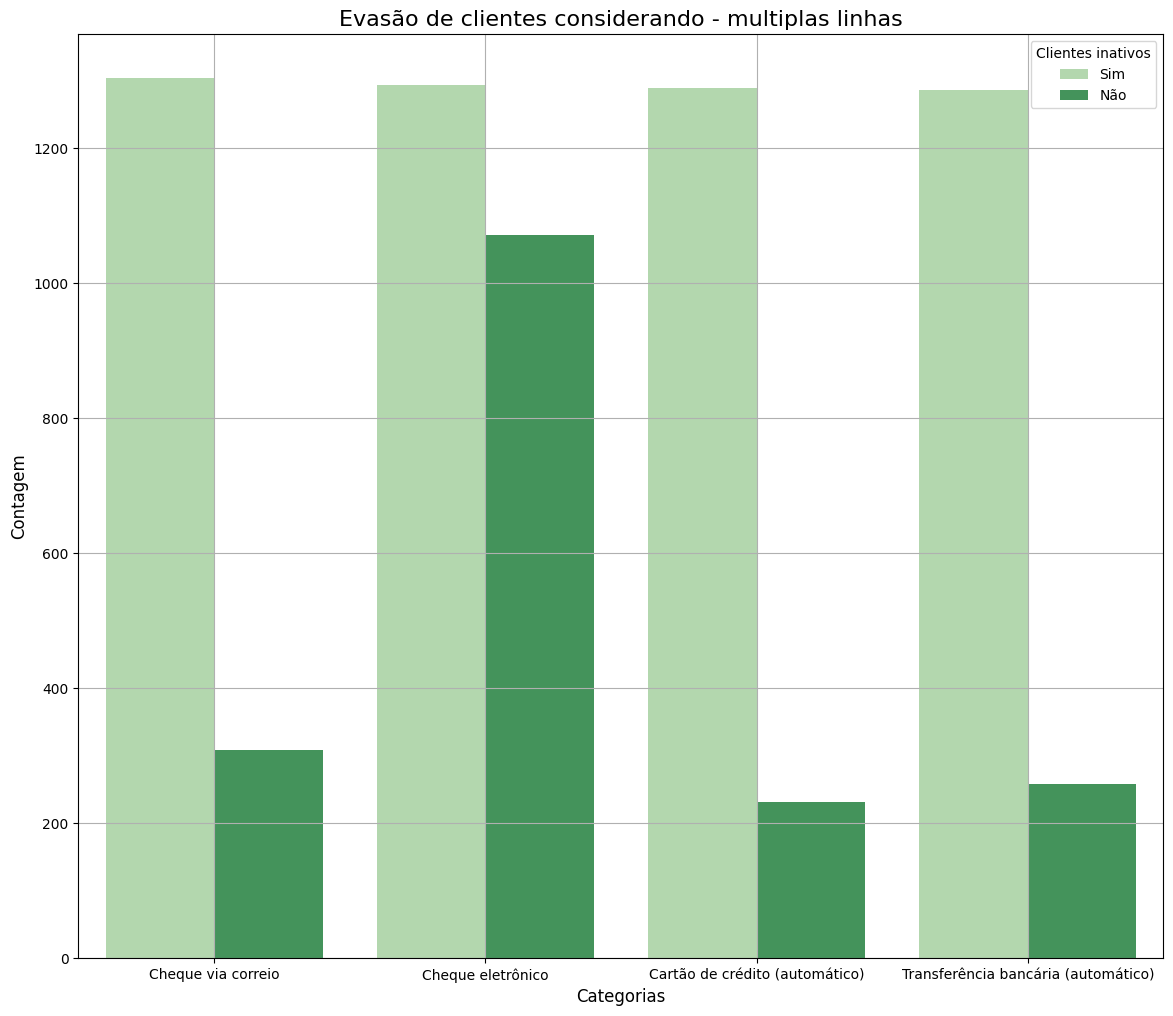

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

sns.countplot(data=base, x='meio_pagamento', palette='Greens', hue='cliente_ativo', legend=True)

plt.title('Evasão de clientes | Meio de pagamento', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes ativos')

plt.grid()

plt.show()

/tmp/ipython-input-2747617483.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nomes)


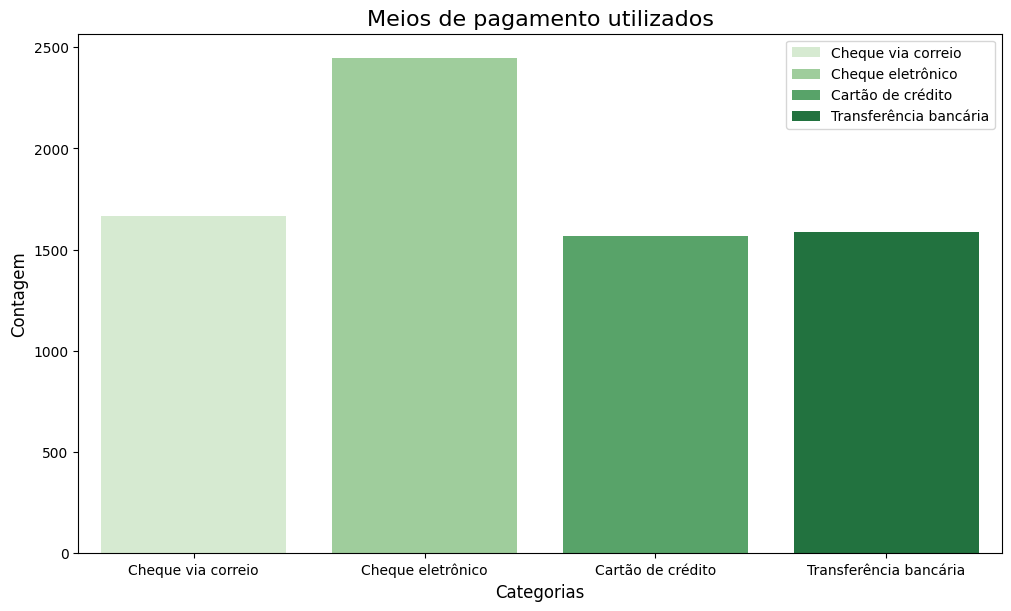

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
nomes = ['Cheque via correio', 'Cheque eletrônico', 'Cartão de crédito', 'Transferência bancária']

sns.countplot(data=df, x='meio_pagamento', palette='Greens', hue='meio_pagamento', legend=True)

plt.title('Meios de pagamento utilizados', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
ax.set_xticklabels(nomes)
plt.legend(nomes)


plt.show()

In [ ]:
base.groupby('cliente_ativo')['fatura_mensal'].describe()

count       mean        std    min    25%     50%   75%  \
cliente_ativo                                                             
Não            1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2   
Sim            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4   

                  max  
cliente_ativo          
Não            118.35  
Sim            118.75

In [ ]:
select_sim.head()

id_cliente cliente_ativo     genero cliente_idoso cliente_parceiro  \
0  0002-ORFBO           Sim   Feminino           Não              Sim   
1  0003-MKNFE           Sim  Masculino           Não              Não   
5  0013-MHZWF           Sim   Feminino           Não              Não   
6  0013-SMEOE           Sim   Feminino           Sim              Sim   
7  0014-BMAQU           Sim  Masculino           Não              Sim   

  cliente_dependentes  meses_contrato linha_telefonica multiplas_linhas  \
0                 Sim               9              Sim              Não   
1                 Não               9              Sim              Sim   
5                 Sim               9              Sim              Não   
6                 Não              71              Sim              Não   
7                 Não              63              Sim              Sim   

  provedor_internet  ... protecao_dispositivo suporte_tecnico streaming_TV  \
0               DSL  ...                  Não             Sim          Sim   
1               DSL  ...                  Não             Não          Não   
5               DSL  ...                  Não             Sim          Sim   
6      Fibra óptica  ...                  Sim             Sim          Sim   
7      Fibra óptica  ...                  Não             Sim          Não   

  streaming_filmes tipo_contrato fatura_digital  \
0              Não         Anual            Sim   
1              Sim        Mensal            Não   
5              Sim        Mensal            Sim   
6              Sim        Bienal            Sim   
7              Não        Bienal            Sim   

                        meio_pagamento fatura_mensal custo_total  \
0                   Cheque via correio         65.60      593.30   
1                   Cheque via correio         59.90      542.40   
5       Cartão de crédito (automático)         69.40      571.45   
6  Transferência bancária (automático)        109.70     7904.25   
7       Cartão de crédito (automático)         84.65     5377.80   

   contas_diarias  
0            2.19  
1            2.00  
5            2.31  
6            3.66  
7            2.82  

[5 rows x 22 columns]

In [ ]:
def faixa_fatura(numero):
  if numero > 0 and numero < 21.00:
    return "Até R$ 20,00"
  elif numero > 21.00 and numero < 41.00:
    return  "Entre R$ 21,00 e R$ 40,00"
  elif numero > 41.00 and numero < 61.00:
    return "Entre R$ 41,00 e R$ 60,00"
  elif numero > 61.00 and numero < 81.00:
    return "Entre R$ 61,00 e R$ 80,00"
  elif numero > 81.00 and numero < 101.00:
    return"Entre R$ 81,00 e R$ 100,00"
  else:
    return "Entre R$ 101,00 e R$ 120,00"

In [ ]:
select_sim['faixa_fatura'] = select_sim['fatura_mensal'].apply(faixa_fatura)

/tmp/ipython-input-342936590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_sim['faixa_fatura'] = select_sim['fatura_mensal'].apply(faixa_fatura)


In [ ]:
select_sim.head()

id_cliente cliente_ativo     genero cliente_idoso cliente_parceiro  \
0  0002-ORFBO           Sim   Feminino           Não              Sim   
1  0003-MKNFE           Sim  Masculino           Não              Não   
5  0013-MHZWF           Sim   Feminino           Não              Não   
6  0013-SMEOE           Sim   Feminino           Sim              Sim   
7  0014-BMAQU           Sim  Masculino           Não              Sim   

  cliente_dependentes  meses_contrato linha_telefonica multiplas_linhas  \
0                 Sim               9              Sim              Não   
1                 Não               9              Sim              Sim   
5                 Sim               9              Sim              Não   
6                 Não              71              Sim              Não   
7                 Não              63              Sim              Sim   

  provedor_internet  ... suporte_tecnico streaming_TV streaming_filmes  \
0               DSL  ...             Sim          Sim              Não   
1               DSL  ...             Não          Não              Sim   
5               DSL  ...             Sim          Sim              Sim   
6      Fibra óptica  ...             Sim          Sim              Sim   
7      Fibra óptica  ...             Sim          Não              Não   

  tipo_contrato fatura_digital                       meio_pagamento  \
0         Anual            Sim                   Cheque via correio   
1        Mensal            Não                   Cheque via correio   
5        Mensal            Sim       Cartão de crédito (automático)   
6        Bienal            Sim  Transferência bancária (automático)   
7        Bienal            Sim       Cartão de crédito (automático)   

  fatura_mensal custo_total contas_diarias                 faixa_fatura  
0         65.60      593.30           2.19    Entre R$ 61,00 e R$ 80,00  
1         59.90      542.40           2.00    Entre R$ 41,00 e R$ 60,00  
5         69.40      571.45           2.31    Entre R$ 61,00 e R$ 80,00  
6        109.70     7904.25           3.66  Entre R$ 101,00 e R$ 120,00  
7         84.65     5377.80           2.82   Entre R$ 81,00 e R$ 100,00  

[5 rows x 23 columns]

In [ ]:
select_nao.head()

id_cliente cliente_ativo     genero cliente_idoso cliente_parceiro  \
2   0004-TLHLJ           Não  Masculino           Não              Não   
3   0011-IGKFF           Não  Masculino           Sim              Sim   
4   0013-EXCHZ           Não   Feminino           Sim              Sim   
18  0022-TCJCI           Não  Masculino           Sim              Não   
19  0023-HGHWL           Não  Masculino           Sim              Não   

   cliente_dependentes  meses_contrato linha_telefonica multiplas_linhas  \
2                  Não               4              Sim              Não   
3                  Não              13              Sim              Não   
4                  Não               3              Sim              Não   
18                 Não              45              Sim              Não   
19                 Não               1              Não              Não   

   provedor_internet  ... protecao_dispositivo suporte_tecnico streaming_TV  \
2       Fibra óptica  ...                  Sim             Não          Não   
3       Fibra óptica  ...                  Sim             Não          Sim   
4       Fibra óptica  ...                  Não             Sim          Sim   
18               DSL  ...                  Sim             Não          Não   
19               DSL  ...                  Não             Não          Não   

   streaming_filmes tipo_contrato fatura_digital  \
2               Não        Mensal            Sim   
3               Sim        Mensal            Sim   
4               Não        Mensal            Sim   
18              Sim         Anual            Não   
19              Não        Mensal            Sim   

                    meio_pagamento fatura_mensal custo_total  contas_diarias  
2                Cheque eletrônico          73.9      280.85            2.46  
3                Cheque eletrônico          98.0     1237.85            3.27  
4               Cheque via correio          83.9      267.40            2.80  
18  Cartão de crédito (automático)          62.7     2791.50            2.09  
19               Cheque eletrônico          25.1       25.10            0.84  

[5 rows x 22 columns]

In [ ]:
select_nao['faixa_fatura'] = select_nao['fatura_mensal'].apply(faixa_fatura)

/tmp/ipython-input-690343257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_nao['faixa_fatura'] = select_nao['fatura_mensal'].apply(faixa_fatura)


In [ ]:
select_nao.head()

id_cliente cliente_ativo     genero cliente_idoso cliente_parceiro  \
2   0004-TLHLJ           Não  Masculino           Não              Não   
3   0011-IGKFF           Não  Masculino           Sim              Sim   
4   0013-EXCHZ           Não   Feminino           Sim              Sim   
18  0022-TCJCI           Não  Masculino           Sim              Não   
19  0023-HGHWL           Não  Masculino           Sim              Não   

   cliente_dependentes  meses_contrato linha_telefonica multiplas_linhas  \
2                  Não               4              Sim              Não   
3                  Não              13              Sim              Não   
4                  Não               3              Sim              Não   
18                 Não              45              Sim              Não   
19                 Não               1              Não              Não   

   provedor_internet  ... suporte_tecnico streaming_TV streaming_filmes  \
2       Fibra óptica  ...             Não          Não              Não   
3       Fibra óptica  ...             Não          Sim              Sim   
4       Fibra óptica  ...             Sim          Sim              Não   
18               DSL  ...             Não          Não              Sim   
19               DSL  ...             Não          Não              Não   

   tipo_contrato fatura_digital                  meio_pagamento fatura_mensal  \
2         Mensal            Sim               Cheque eletrônico          73.9   
3         Mensal            Sim               Cheque eletrônico          98.0   
4         Mensal            Sim              Cheque via correio          83.9   
18         Anual            Não  Cartão de crédito (automático)          62.7   
19        Mensal            Sim               Cheque eletrônico          25.1   

   custo_total contas_diarias                faixa_fatura  
2       280.85           2.46   Entre R$ 61,00 e R$ 80,00  
3      1237.85           3.27  Entre R$ 81,00 e R$ 100,00  
4       267.40           2.80  Entre R$ 81,00 e R$ 100,00  
18     2791.50           2.09   Entre R$ 61,00 e R$ 80,00  
19       25.10           0.84   Entre R$ 21,00 e R$ 40,00  

[5 rows x 23 columns]

In [ ]:
select_sim.groupby('cliente_ativo')['faixa_fatura'].value_counts()

cliente_ativo  faixa_fatura               
Sim            Entre R$ 81,00 e R$ 100,00     1074
               Até R$ 20,00                   1058
               Entre R$ 61,00 e R$ 80,00      1030
               Entre R$ 41,00 e R$ 60,00       825
               Entre R$ 101,00 e R$ 120,00     595
               Entre R$ 21,00 e R$ 40,00       592
Name: count, dtype: int64

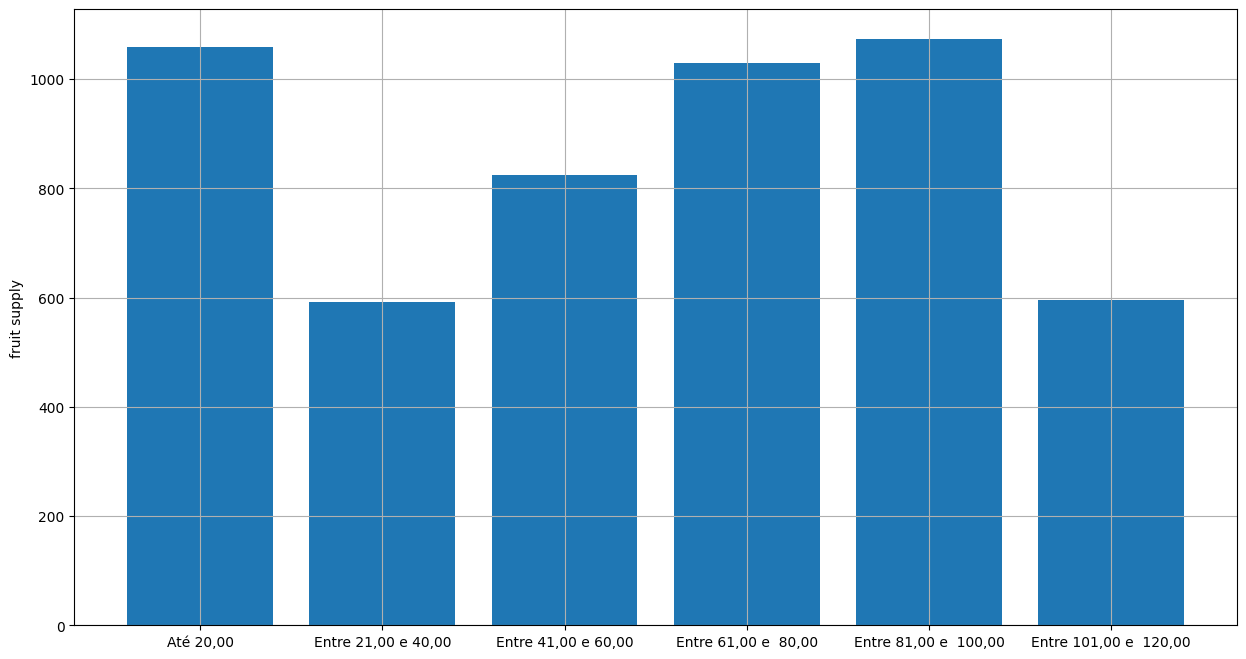

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,8))

faixas = ['Até 20,00', 'Entre 21,00 e 40,00', 'Entre 41,00 e 60,00', 'Entre 61,00 e  80,00', 'Entre 81,00 e  100,00', 'Entre 101,00 e  120,00']
quantidades = [1058, 592, 825, 1030, 1074, 595]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

#ax.bar(faixas, quantidades, label=bar_labels, color=bar_colors)
ax.bar(faixas, quantidades)

ax.set_ylabel('fruit supply')
#ax.set_title('Fruit supply by kind and color')
#ax.legend(title='Fruit color')
plt.grid()

plt.show()

In [ ]:
select_nao.groupby('cliente_ativo')['faixa_fatura'].value_counts()

cliente_ativo  faixa_fatura               
Não            Entre R$ 81,00 e R$ 100,00     632
               Entre R$ 61,00 e R$ 80,00      521
               Entre R$ 41,00 e R$ 60,00      275
               Entre R$ 101,00 e R$ 120,00    218
               Entre R$ 21,00 e R$ 40,00      122
               Até R$ 20,00                   101
Name: count, dtype: int64

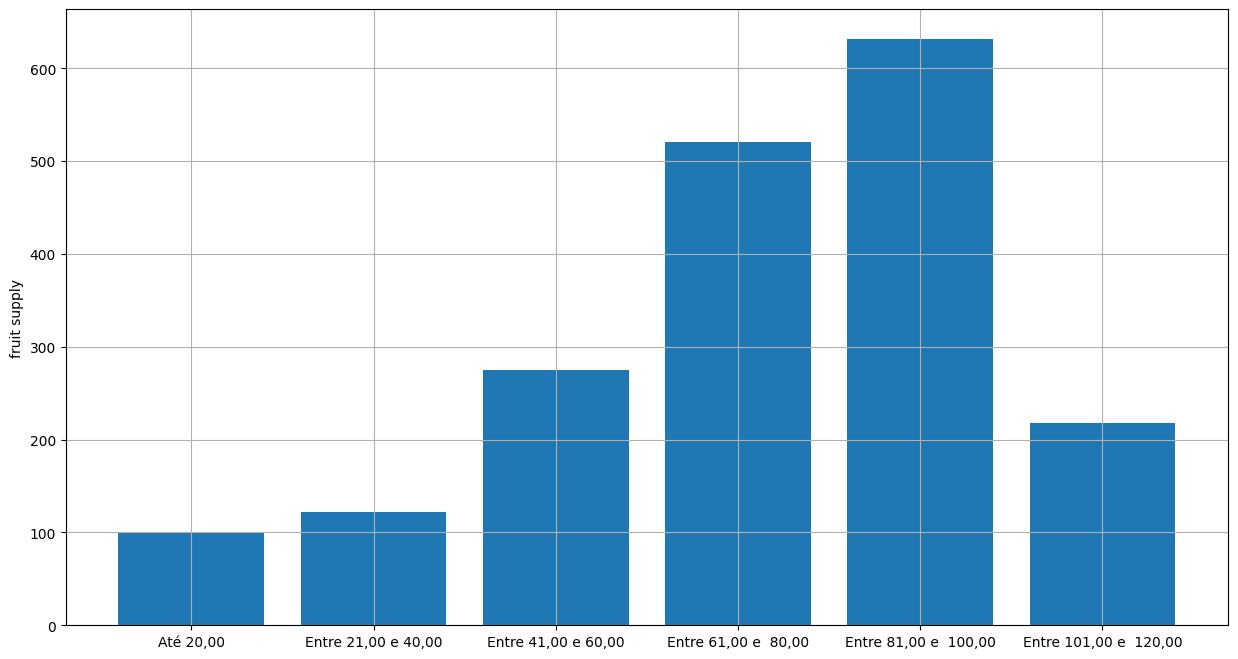

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,8))

faixas = ['Até 20,00', 'Entre 21,00 e 40,00', 'Entre 41,00 e 60,00', 'Entre 61,00 e  80,00', 'Entre 81,00 e  100,00', 'Entre 101,00 e  120,00']
quantidades = [101, 122, 275, 521, 632, 218]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

#ax.bar(faixas, quantidades, label=bar_labels, color=bar_colors)
ax.bar(faixas, quantidades)

ax.set_ylabel('fruit supply')
#ax.set_title('Fruit supply by kind and color')
#ax.legend(title='Fruit color')
plt.grid()

plt.show()

In [ ]:
select_sim.groupby('tipo_contrato')['faixa_fatura'].value_counts()

tipo_contrato  faixa_fatura               
Anual          Até R$ 20,00                   289
               Entre R$ 81,00 e R$ 100,00     261
               Entre R$ 61,00 e R$ 80,00      254
               Entre R$ 41,00 e R$ 60,00      204
               Entre R$ 101,00 e R$ 120,00    178
               Entre R$ 21,00 e R$ 40,00      121
Bienal         Até R$ 20,00                   393
               Entre R$ 81,00 e R$ 100,00     297
               Entre R$ 101,00 e R$ 120,00    279
               Entre R$ 21,00 e R$ 40,00      272
               Entre R$ 61,00 e R$ 80,00      272
               Entre R$ 41,00 e R$ 60,00      134
Mensal         Entre R$ 81,00 e R$ 100,00     516
               Entre R$ 61,00 e R$ 80,00      504
               Entre R$ 41,00 e R$ 60,00      487
               Até R$ 20,00                   376
               Entre R$ 21,00 e R$ 40,00      199
               Entre R$ 101,00 e R$ 120,00    138
Name: count, dtype: int64

In [ ]:
select_nao.groupby('tipo_contrato')['faixa_fatura'].value_counts()

tipo_contrato  faixa_fatura               
Anual          Entre R$ 101,00 e R$ 120,00     62
               Entre R$ 81,00 e R$ 100,00      46
               Entre R$ 61,00 e R$ 80,00       25
               Entre R$ 41,00 e R$ 60,00       21
               Até R$ 20,00                     7
               Entre R$ 21,00 e R$ 40,00        5
Bienal         Entre R$ 101,00 e R$ 120,00     23
               Entre R$ 81,00 e R$ 100,00       8
               Entre R$ 61,00 e R$ 80,00        7
               Entre R$ 41,00 e R$ 60,00        5
               Entre R$ 21,00 e R$ 40,00        3
               Até R$ 20,00                     2
Mensal         Entre R$ 81,00 e R$ 100,00     578
               Entre R$ 61,00 e R$ 80,00      489
               Entre R$ 41,00 e R$ 60,00      249
               Entre R$ 101,00 e R$ 120,00    133
               Entre R$ 21,00 e R$ 40,00      114
               Até R$ 20,00                    92
Name: count, dtype: int64

/tmp/ipython-input-2747617483.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nomes)


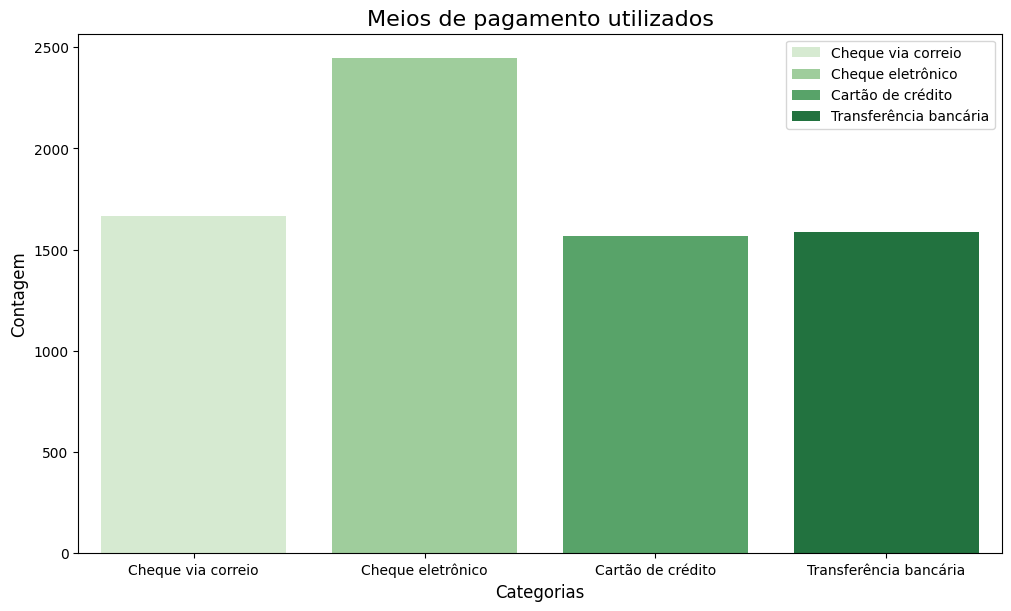

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
nomes = ['Cheque via correio', 'Cheque eletrônico', 'Cartão de crédito', 'Transferência bancária']

sns.countplot(data=df, x='meio_pagamento', palette='Greens', hue='meio_pagamento', legend=True)

plt.title('Meios de pagamento utilizados', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
ax.set_xticklabels(nomes)
plt.legend(nomes)


plt.show()

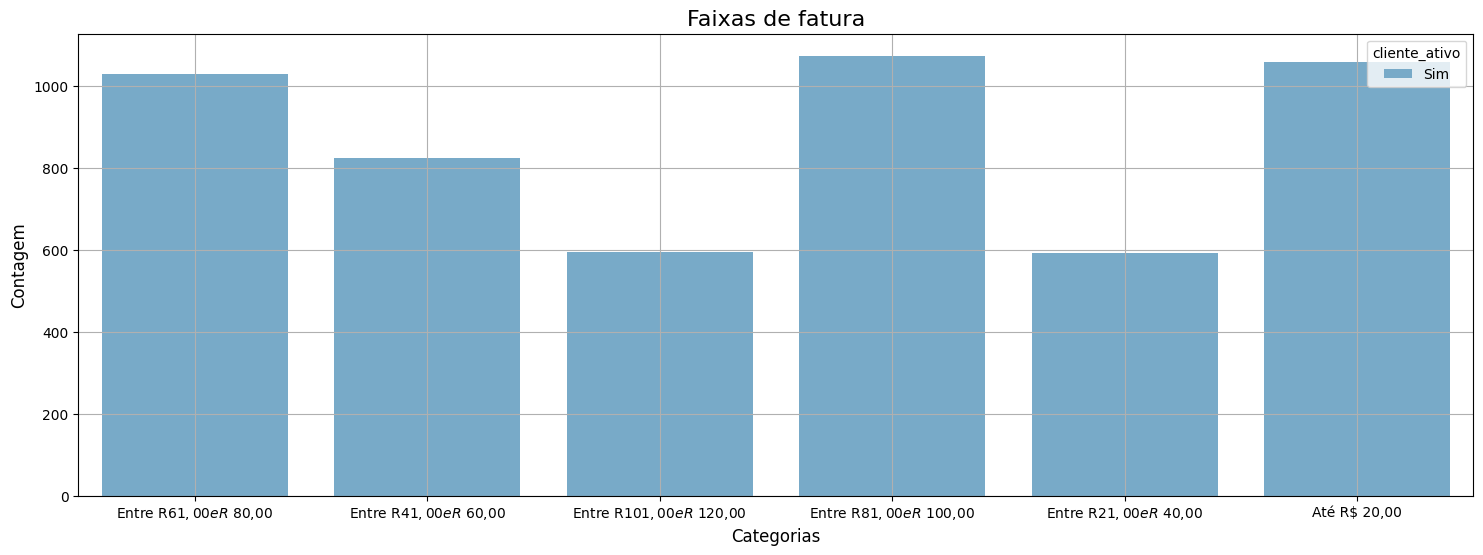

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot(data=select_sim, x='faixa_fatura', palette='Blues', hue='cliente_ativo')

plt.title('Faixas de fatura', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['fatura_digital'].value_counts()

cliente_ativo  fatura_digital
Não            Sim               1400
               Não                469
Sim            Sim               2771
               Não               2403
Name: count, dtype: int64

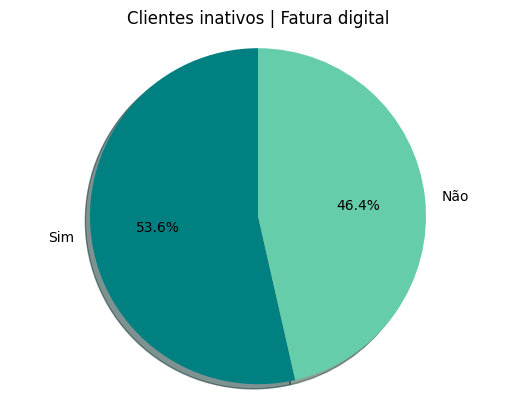

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [2771, 2403]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Clientes inativos | Fatura digital')

plt.show()

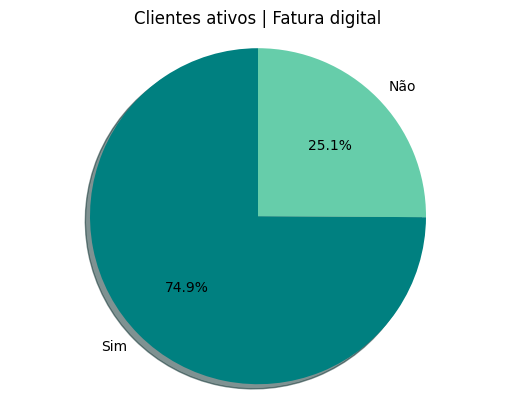

In [ ]:
import matplotlib.pyplot as plt


labels = 'Sim', 'Não'
sizes = [1400, 469]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#008080', '#66cdaa'])
ax1.axis('equal')
plt.title('Clientes ativos | Fatura digital')

plt.show()

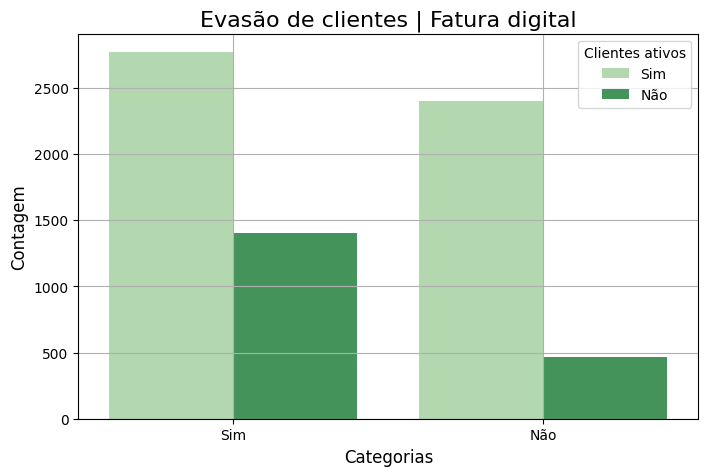

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(data=base, x='fatura_digital', palette='Greens', hue='cliente_ativo')

plt.title('Evasão de clientes | Fatura digital', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Clientes ativos')
plt.grid()

plt.show()

In [ ]:
base.groupby('cliente_ativo')['fatura_mensal'].describe()

count       mean        std    min    25%     50%   75%  \
cliente_ativo                                                             
Não            1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2   
Sim            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4   

                  max  
cliente_ativo          
Não            118.35  
Sim            118.75

In [ ]:
base.groupby('cliente_ativo')['fatura_mensal'].value_counts().head()

cliente_ativo  fatura_mensal
Não            74.40            13
               74.90             9
               45.30             8
               74.95             8
               70.00             7
Name: count, dtype: int64

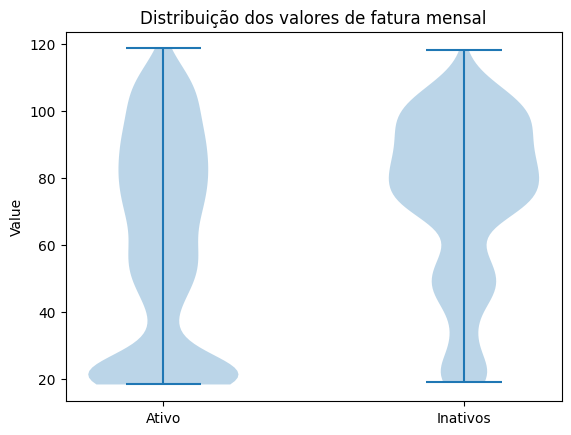

In [ ]:

dados = [select_sim['fatura_mensal'], select_nao['fatura_mensal']]

# Create the plot
fig, ax = plt.subplots()
ax.violinplot(dados)

# Add labels and title
ax.set_xticks([1, 2])
ax.set_xticklabels([ 'Ativo', 'Inativos'])
ax.set_ylabel('Value')
ax.set_title('Distribuição dos valores de fatura mensal')

plt.show()

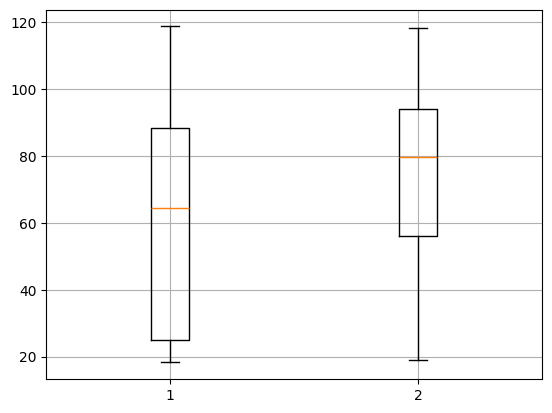

In [ ]:
import matplotlib.pyplot as plt


# Creating dataset

data = [select_sim['fatura_mensal'], select_nao['fatura_mensal']]

# Creating plot
plt.boxplot(data)
plt.grid()

# Show plot
plt.show()

In [ ]:
base.groupby('cliente_ativo')['custo_total'].describe()

count         mean          std    min    25%       50%  \
cliente_ativo                                                             
Não            1869.0  1531.796094  1890.822994  18.85  134.5   703.550   
Sim            5174.0  2549.911442  2329.954215   0.00  572.9  1679.525   

                   75%      max  
cliente_ativo                    
Não            2331.30  8684.80  
Sim            4262.85  8672.45

In [ ]:
base.groupby('cliente_ativo')['custo_total'].value_counts()

cliente_ativo  custo_total
Não            20.20          6
               45.30          5
               19.90          4
               20.15          4
               69.60          4
                             ..
Sim            8547.15        1
               8564.75        1
               8594.40        1
               8670.10        1
               8672.45        1
Name: count, Length: 6698, dtype: int64

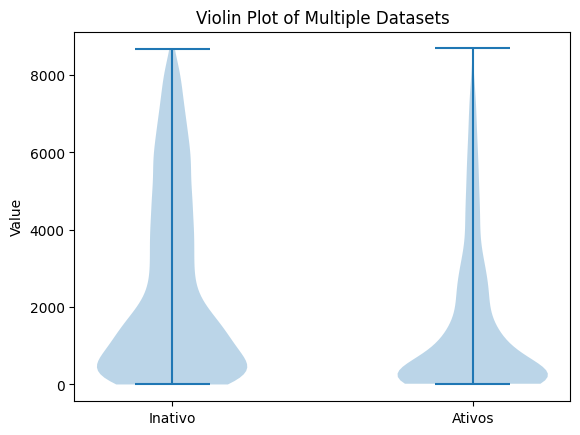

In [ ]:

dados = [select_sim['custo_total'], select_nao['custo_total']]

# Create the plot
fig, ax = plt.subplots()
ax.violinplot(dados)

# Add labels and title
ax.set_xticks([1, 2])
ax.set_xticklabels([ 'Inativo', 'Ativos'])
ax.set_ylabel('Value')
ax.set_title('Violin Plot of Multiple Datasets')

plt.show()

In [ ]:
base.groupby('cliente_ativo')['contas_diarias'].describe()

count     mean       std   min   25%   50%   75%   max
cliente_ativo                                                         
Não            1869.0  2.48145  0.822287  0.63  1.87  2.66  3.14  3.94
Sim            5174.0  2.04208  1.036492  0.61  0.84  2.15  2.95  3.96

In [ ]:
base.groupby('cliente_ativo')['contas_diarias'].value_counts()

cliente_ativo  contas_diarias
Não            2.48              35
               2.34              30
               2.84              28
               2.68              27
               2.33              25
                                 ..
Sim            1.44               1
               1.57               1
               1.58               1
               1.59               1
               3.94               1
Name: count, Length: 583, dtype: int64

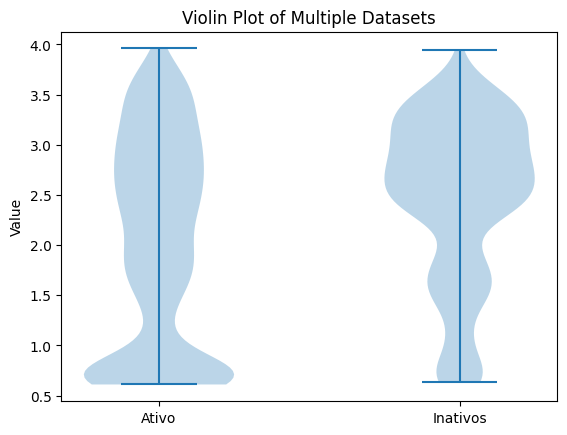

In [ ]:

dados = [select_sim['contas_diarias'], select_nao['contas_diarias']]


fig, ax = plt.subplots()
ax.violinplot(dados)


ax.set_xticks([1, 2])
ax.set_xticklabels([ 'Ativo', 'Inativos'])
ax.set_ylabel('Value')
ax.set_title('Violin Plot of Multiple Datasets')

plt.show()

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7043 non-null   object 
 1   cliente_ativo         7043 non-null   object 
 2   genero                7043 non-null   object 
 3   cliente_idoso         7043 non-null   object 
 4   cliente_parceiro      7043 non-null   object 
 5   cliente_dependentes   7043 non-null   object 
 6   meses_contrato        7043 non-null   int64  
 7   linha_telefonica      7043 non-null   object 
 8   multiplas_linhas      7043 non-null   object 
 9   provedor_internet     7043 non-null   object 
 10  seguranca_online      7043 non-null   object 
 11  backup_online         7043 non-null   object 
 12  protecao_dispositivo  7043 non-null   object 
 13  suporte_tecnico       7043 non-null   object 
 14  streaming_TV          7043 non-null   object 
 15  streaming_filmes      7043

In [ ]:
base.to_csv('clientes_evasao.csv', index=False)

#📄Relatorio Final

### **Introdução**
-------------------------------------------------------------------------------

 A **Telecom X** é uma empresa de telecomunicações que oferece variada gama de
  serviços:
 * Telefonia:
 * Provedor de internet:
    * DSL
    * Fibra óptica

    Serviços adicionais:
    * Segurança online
    * Backup online
    * Proteção ao dispositivo
    * Suporte técnico
    * Tv a Cabo
    * Streaming de filmes


Ocorre que a empresa tem enfrentado a evasão de clientes, o que pode ser muito danosa: a queda no número de clientes pode implicar em menor lucratividade da atividade empresarial, o que afeta a saúde financeira pela perda imediata de receita e pelo maior custo para aquisição de clientes.

Também pode afetar a continuidade das atividades uma vez que reduz o capital para investimento, pagamento de fornecedores e folha de salários.

A evasão contribui para a dificuldade de crescimento, uma vez que a retenção de clientes age de forma a remediar, mitigar os danos, ou seja, apagar os pequenos incêndios, e não na manutenção e aumento de número de clientes.

Clientes que evadem são clientes insatisfeitos: poderão compartilhar suas queixas nas redes sociais, em sites de reputação de empresas ou nos serviços de proteção ao consumidor - o que pode gerar aumento do número de demandas e custos relacionados.

Ademais, possíveis clientes podem avaliar que a empresa não tem produtos/serviços de qualidade ou mesmo, que o cliente pode ter dor de cabeça com a empresa.


Esta análise visa fornecer material que apoie a tomada de decisões para lidar com a evasão de clientes.

### **Limpeza e tratamento de dados**
-------------------------------------------------------------------------------

1. **Importação dos dados**

*   O arquivo recebido possui 7267 linhas e 6 colunas, a saber: customerID, Churn, customer, phone, phone, internet e account, sendo que as 5 últimas continham uma estrutura aninhada.

Por isso, além da biblioteca Pandas para leitura, antes da conversão em um dataframe, foi necessário utilizar a furção de normalização.

*   Variáveis pós normalização:

| Variáveis originais |  Variáveis normalizadas |
------------|----------------|
**customerID**  |          |
**Churn**      |           |
**customer** | customer.gender|
**customer** | customer.SeniorCitizen |
**customer** | customer.Partner |
**customer** | customer.Dependents |
**customer** | customer.tenure |
**phone** | phone.PhoneService |
**phone** | phone.MultipleLines |
**internet** | internet.InternetService |
**internet** | internet.OnlineSecurity |
**internet** | internet.OnlineBackup |
**internet** | internet.DeviceProtection |
**internet** | internet.TechSupport |
**internet** | internet.StreamingTV |
**internet** | internet.StreamingMovies |
**account**  | account.Contract |
**account**  | account.PaperlessBilling |
**account**  | account.PaymentMethod |
**account**  | account.Charges.Monthly |
**account**  | account.Charges.Total |



2. **Verificação de inconsistências**:

Foram investigadas as ocorrência de dados nulos, em branco, repetidos, ou seja, o que significasse alguma incoerência.

As colunas foram renomeadas, trazendo maior facilidade de entendimento aos dados, assim como os rótulos de cada variável, considerando que os dados estão em idioma inglês.

**customerID**: o número único de cada cliente, formado por uma sequência de 4 números, um traço e 5 letras maiúsculas. Ex: [0000-AAAAA]. Não foram encontrados números repetidos, o que poderia representar duplicação de registros ou dados em branco. A coluna foi renomeada como 'id_cliente'.

**Churn**: indica se o cliente deixou ou não a empresa, com valores 'Sim' e 'Não'. Foram encontrados 224 registros com espaço vazio. Considerando que esta porção é 3,1% do conjunto, uma opção é a exclusão listwise, que pode ser apropriada pela pequena magnitude - menor que 5% - sem gerar prejuízos à análise.

A coluna foi renomeada como 'cliente_ativo', obtendo:
 * 5174 registros ativos (71,2%)
 * 1869 registros inativos (25,7%)
 * 224 registros sem informação (3,1%)

Com estes registros, sugere-se que possa ser verificada a possibilidade de utilizar um algoritmo de clusterização, de forma a agrupar os dados de acordo com carcterísticas semelhantes e estimar o dado correspondente.

**customer.gender**: indica o gênero do cliente:
  * 3675 registros do gênero masculino (50,6%)
  * 3592 registros do gênero feminino (49,4%)
  A coluna foi renomeada como 'genero'.

**customer.SeniorCitizen**: indica se o cliente tem idade igual ou maior de 65 anos.
  * 6085 registros de pessoas não idosas (83,7%)
  * 1182 registros de pessoas idosas (16,3%)
  A coluna foi renomeada como 'cliente_idoso'.

**customer.Partner**: indica se o cliente possui ou não parceiro/parceira, cônjuge ou convivente.
  * 3518 registros de pessoas com parceiro (48,4%)
  * 3749 registros de pessoas sem parceiro (51,6%)
  A coluna foi renomeada como 'cliente_parceiro'

**customer.Dependents**: indica se o cliente possui dependentes
  * 2181 registros de pessoas com dependentes (30%)
  * 5086 registros de pessoas sem dependentes (70%)
  A coluna foi renomeada como 'cliente_dependentes'


**customer.tenure**: número de meses de contrato do cliente, com um intervalo de 0 a 72.
  Em 11 casos, o número de meses é igual a 0. Esta variável está associada à account.Charges.Total, total gasto pelo cliente, com espaço vazio. Também são clientes que não evadiram, o que faz presumir que são clientes que ainda não completaram o primeiro mês de contrato e ainda não receberam sua fatura. Os valores em branco foram completados com 0.
  A coluna foi renomeada como 'meses_contrato'.



**phone.PhoneService**: indica se o cliente possui assinatura de serviço telefônico.
  * 6560 pessoas possuem linha telefônica (90,3%)
  * 707 não possue linha telefônica (9,7%)
  A coluna foi renomeada como 'linha_telefonica'

**phone.MultipleLines**: indica se o cliente possui mais de uma linha telefônica. Na forma original, temos como valores 'Sim', 'Não' e 'Sem serviço de telefonia'. As duas últimas foram agrupadas em uma única categoria: 'Não'.
  * 3065 pessoas possuem mais de uma linha (42,2%)
  * 4202 pessoas não tem mais de uma linha ou não tem serviço de telefonia (57,8%)
  A coluna foi renomeada como 'multiplas_linhas'.

**internet.InternetService**: indica se o cliente possui o serviço de provedor de internet.
  * 3198 pessoas tem Fibra óptica (44%)
  * 2488 pessoas tem DSL (34,2%)
  * 1581 pessoas não tem serviço de internet (21,8%)
  A coluna foi renomeada como 'provedor_internet'

**internet.OnlineSecurity**: indica se o cliente possui assinatura  adicional do serviço de segurança online.
  * 2078 pessoas tem a assinatura (28,6%)
  * 5089 pessoas não tem assinatura do serviço ou provedor de internet.
  A coluna foi renomeada como 'seguranca_online'.

**internet.OnlineBackup**: indica se o cliente possui assinatura adicional do serviço de backup online
  * 2504 pessoas tem a assinatura (34,5%)
  * 4763 pessoas não tem a assinatura (65,5%)
  A coluna foi renomeada como 'backup_online'.

**internet.DeviceProtection**: indica se o cliente possui assinatura adicional do serviço de proteção de dispositivo
  * 2492 pessoas tem a assinatura (34,3%)
  * 4776 pessoas não tem a assinatura (65,7%)
  A coluna foi renomeada como 'protecao_dispositivo'.

**internet.TechSupport**: indica se o cliente possui assinatura adicional do serviço de suporte técnico
  * 2104 pessoas tem a assinatura (29%)
  * 5163 pessoas não tem a assinatura (71%)
  A coluna foi renomeada como 'suporte_tecnico'.

**internet.StreamingTV**: indica se o cliente possui assinatura adicional do serviço de TV a cabo
  * 2790 pessoas tem a assinatura (38,4%)
  * 4477 pessoas não tem a assinatura (61,6%)
  A coluna foi renomeada como 'streaming_TV'.

**internet.StreamingMovies**: indica se o cliente possui assinatura adicional do serviço de streaming de filmes
  * 2816 pessoas tem a assinatura (38,8%)
  * 4451 pessoas não tem a assinatura (61,2%)
  A coluna foi renomeada como 'streaming_filmes'.


**account.Contract**: indica o tipo de contrato.
  * 4005 pessoas tem contrato mensal (55,1%)
  * 1519 pessoas tem contrato anual (20,9%)
  * 1743 pessoas tem contrato bienal (24%)
  A coluna foi renomeada como 'tipo_contrato'

**account.PaperlessBilling**: indica se o cliente prefere receber a fatura online
  * 4311 pessoas preferem fatura online (59,3%)
  * 2956 pessoas não recebem a fatura online (40,7%)
  A coluna foi renomeada como 'fatura_digital'

**account.PaymentMethod**: indica a forma de pagamento pelos serviços contratados
  * 2445 utilizam Cheque eletrônico (33,6%)
  * 1665 utilizam Cheque via correio (22,9%)
   - Meios não automáticos somam 56,6%
  * 1589 utilizam Cheque Eletrônico (21,9%)
  * 1568 utilizam Cheque Eletrônico (21,6%)
  - Meios automáticos somam 43,4%
  A coluna foi renomeada como 'meio_pagamento'


| Variáveis  |  Variáveis renomeadas |
------------|----------------|
customerID | id_cliente |
Churn     |   cliente_ativo  |
customer.gender | genero |
customer.SeniorCitizen | cliente_idoso  |
customer.Partner  | cliente_parceiro |
customer.Dependents | cliente_dependentes |
customer.tenure | meses_contrato |
phone.PhoneService | linha_telefonica |
phone.MultipleLines | multiplas_linhas|
internet.InternetService | provedor_internet |
internet.OnlineSecurity | seguranca_online |
internet.OnlineBackup  | backup_online |
internet.DeviceProtection  |  protecao_dispositivo |
internet.TechSupport  | suporte_tecnico |
internet.StreamingTV  |  streaming_TV |
internet.StreamingMovies  | streaming_filmes |
account.Contract  | tipo_contrato |
account.PaperlessBilling  | fatura_digital |
account.PaymentMethod  | meio_pagamento |
account.Charges.Monthly  | fatura_mensal |
account.Charges.Total  | custo_total  |
   --------  ▶ | contas_diarias |




* Ademais, foi criada a coluna contas_diarias que é resultado do valor mensal (fatura_mensal) dividido por 30 para obter o valor diário.

### **Análise Exploratória de Dados**

A partir das alterações, obtivemos um conjunto de dados com 7043 linhas e 22 colunas.

A palavra 'churn' representa evasão, cancelamento ou abandono de clientes, por exemplo, clientes que cancelam contrato de serviço com a empresa.

Neste contexto, Churn Rate é uma métrica que auxilia na análise de como a empresa encontra-se quando o assunto é resultado, mensurando o percentual de clientes que abandonam o serviço e traçar planos de ação para que esta situação seja contornada.

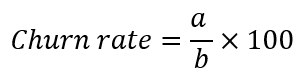

**Churn Rate** é igual à **Quantidade de clientes que evadiram (a)** dividido pela **Quantidade total de clientes (b)** x 100.

O Churn rate é de 26,5% dos clientes, constante que 73,5% são clientes ativos.


**Análise de agrupamentos**

Foram feitos agrupamentos a partir da variável de evasão ('cliente_ativo') com outras variáveis do conjunto de dados, possibilitando que algumas características possam ser evidenciadas.

* Agrupamento pela variável cliente_ativo ('churn') do gênero do cliente



| Ativo  | Gênero  | Frequência | Percentual | Percentual total |
|--------|---------|-----------|----------|-------------------|
| Não  |  Masculino | 930  | 49,8%     |  13,2%
|   |  Feminino | 939  | 50,2%     | 13,3%
|   |   | 1869  |      |
| Sim  |  Masculino | 2625  | 50,7%     | 37,3%
|   |  Feminino | 2549  | 49,3%     | 36,2%
|   |   | 5174  |      |

Dos clientes que deixaram de utilizar os serviços da empresa, os resultados (percentuais e numéricos) são muito próximos.

* Agrupamento pela variável cliente_ativo ('churn') quanto ao cliente ter idade igual ou maior de 65 anos (idoso)


| Ativo  | Idoso  | Frequência | Percentual |
|--------|---------|-----------|----------|
| Não  |  Sim | 476  | 19,8%     |
|   |  Não | 1393  | 80,2%     |
| Sim  |  Sim | 666  | 12,9%     |
|   |  Não | 4508  | 87,1%     |

O maior percentual de clientes não é idoso, e isso se reflete também no agrupamento que possui percentuais próximos.

* Agrupamento pela variável cliente_ativo ('churn') quanto ao cliente ter parceiro ou cônjuge.


| Ativo  | Com parceiro  | Frequência | Percentual |
|--------|---------|-----------|----------|
| Não  |  Sim | 669  | 35,8%     |
|   |  Não | 1200  | 64,2%     |  
| Sim  |  Sim | 2733  | 52,8%     |  
|   |  Não | 2441  | 47,2%     |

No Brasil, a maioridade civil é atingida aos 18 anos, por regra, quando pode praticar plenamente os atos da vida civil - também a idade mínima para celebração de contratos.

Nota-se que, quanto a este critério, 64,2% dos clientes inativos não tinham parceiros.

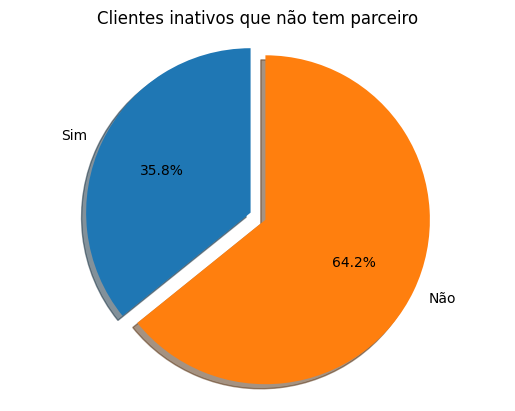



> Em 2023, a idade média dos cônjuges solteiros que se casaram com pessoas do sexo oposto era de 29,2 anos para mulheres e 31,5 anos para os homens.

[Fonte: Agência Brasil](https://agenciabrasil.ebc.com.br/geral/noticia/2025-05/casamento-entre-mulheres-cresce-59-e-e-recorde-em-2023-mostra-ibge?utm_source=chatgpt.com)



* Agrupamento pela variável cliente_ativo ('churn') quanto ao cliente ter dependentes


| Ativo  | Dependentes  | Frequência | Percentual |
|--------|---------|-----------|----------|
| Não  |  Sim | 326  | 17,6%     |
|   |  Não | 1543  | 82,4%     |
| Sim  |  Sim | 1784  | 34,5%     |  
|   |  Não | 3390  | 65,5%     |  

Notamos que 82,4% dos clientes inativos não tinham dependentes.

Com isso, podemos estabelecer que o **perfil humano** predisposto à deixar de ser cliente são pessoas:
  * sem parceiro ou cônjuge
  * sem dependentes.

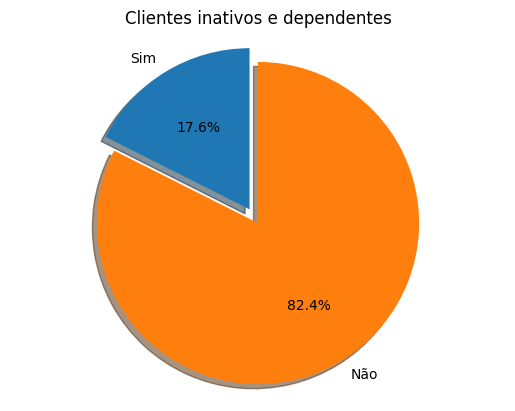

Com os próximos dados, nosso olhar se voltará para estabelecer um perfil de consumo dos clientes.

* Agrupamento pela variável cliente_ativo ('churn') quanto ao número de meses de contrato, ou seja, o tempo de permanência como cliente.



| Valor  | Inativo  | Ativo |
|--------|--------------|---------|
| Média   | 17  | 37  |
| Minimo  | 1  | 0
| 25%    | 2  | 15
| 50%    | 10  | 38
| 75%    | 29 | 61
| 100%  | 72  |  72



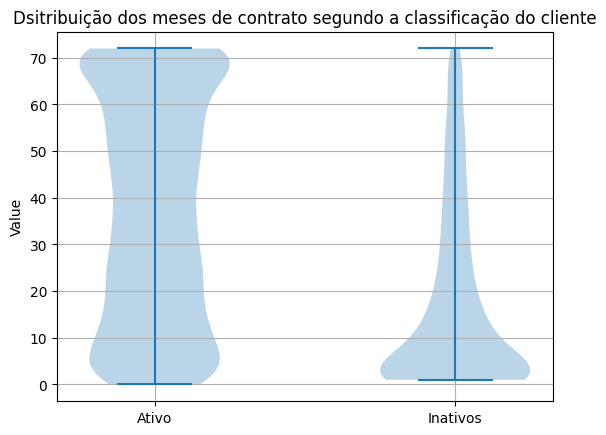

Os dados tabulares assim como do gráfico *violin plot* demonstram que os clientes ativos tem, em média, um maior tempo de contrato.

O tempo parece-nos ser preditor quanto à classificação do cliente. Observa-se que a concentração de metade dos casos de clientes inativos está em 10 meses com uma drástica queda, sem a manutenção dos contratos.

* Agrupamento pela variável cliente_ativo ('churn') quanto à adesão de serviço de linha telefônica



| Ativo  | Linha telefônica | Quantidade | Percentual |
|--------|--------------|---------|-----|
| Não   | Sim  |  1699  | 90,9%  |
|     | Não | 170   | 9,1%   |  
| Sim  | Sim  | 4662   | 90,1%   |
|    | Não | 512   |  9,9%   |  

A linha telefônica parece ser o principal serviço da empresa, tanto para clientes ativos como inativos.

* Agrupamento pela variável cliente_ativo ('churn') quanto à adesão de mais de uma linha telefônica



| Ativo  | Múltiplas linhas | Frequência | Percentual
|--------|--------------|---------|-----|
| Não   | Sim  |  850  | 45,5%  |
|     | Não | 1019   | 54,5%   |  
| Sim  | Sim  | 2121   | 41%   |
|   | Não | 3053   |  59%   |  

Para ambos os casos, o maior número de ocorrências é não ter multiplas linhas e, entre os clientes inativos, a diferença percentual é menos de 10%, podendo ser considerada baixa.

Talvez, ter linha telefônica pode estar associado ao tipo de provedor de internet, uma vez que a DSL (Digital Subscriber Line) utiliza a linha telefônica.

* Agrupamento pela variável cliente_ativo ('churn') quanto ao provedor de internet


| Ativo  | Provedor de internet | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | DSL  |  459  | 24,6%  
|     | Fibra óptica | 1297   | 69,4%   
|     | Sem serviço de internet | 113   | 6%   
| Sim  | DSL  | 1962   | 37,9%   
|   | Fibra óptica | 1799   |  34,8%  
|   | Sem serviço de internet | 1413   |  27,3%  

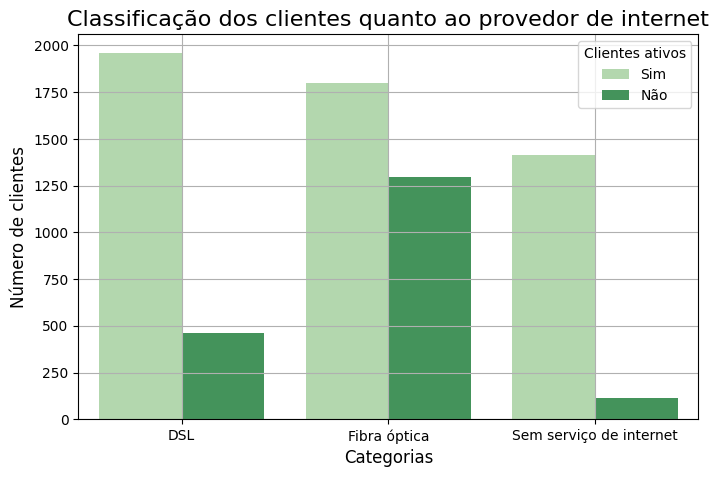

Quanto aos clientes ativos, o serviço de provedor de internet DSL é o mais utilizado. Quanto aos inativos, é a Fibra Óptica.

Outro ponto é que, 72,7% dos clientes ativos tinham o serviço, e os clientes inativos, 94% tinham serviço de internet.

Neste momento, adentramos nos números dos serviços adicionais.

* Agrupamento pela variável cliente_ativo ('churn') quanto ao serviço adicional de segurança online.

| Ativo  | Segurança online | Frequência | Percentual|
|--------|--------------|---------|-----|
| Não   | Sim  |  295  | 15,8%  
|     | Não | 1574   | 84,2%   
| Sim  | Sim  | 1724   | 33,3%   
|   | Não | 3450   |  66,7%  


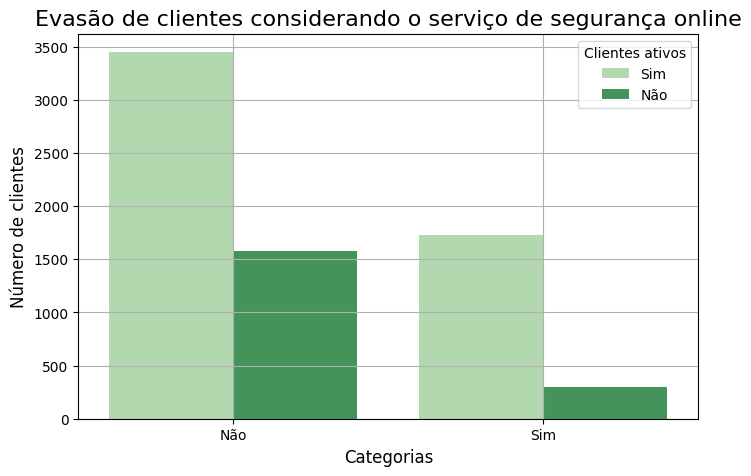

84,2% não tem o serviço de segurança online dos clientes inativos.

* Agrupamento pela variável cliente_ativo ('churn') quanto ao serviço adicional de backup online

| Ativo  | Backup online | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | Sim  |  523  | 28%  
|     | Não | 1346   | 72%   
| Sim  | Sim  | 1906   | 36,8%   
|   | Não | 3268   |  63,2%  

72% não tem o serviço de backup online dos clientes inativos.




* Agrupamento pela variável cliente_ativo ('churn') quanto ao serviço adicional de proteção ao dispositivo

cliente_ativo x protecao_dispositivo

| Ativo  | Proteção de dispositivo | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | Sim  |  545  | 29,2%  
|    | Não | 1324   | 70,8%   
| Sim  | Sim  | 1877   | 36,3%   
|   | Não | 3297   |  63,7%  

70% não tem o serviço de proteção ao dispositivos dos clientes inativos.


* Agrupamento pela variável cliente_ativo ('churn') quanto ao serviço adicional de suporte técnico



| Ativo  | Suporte técnico | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | Sim  |  310  | 16,6%  
|     | Não | 1559   | 83,4%   
| Sim  | Sim  | 1734   | 33,5%   
|   | Não | 3440   |  66,5%  

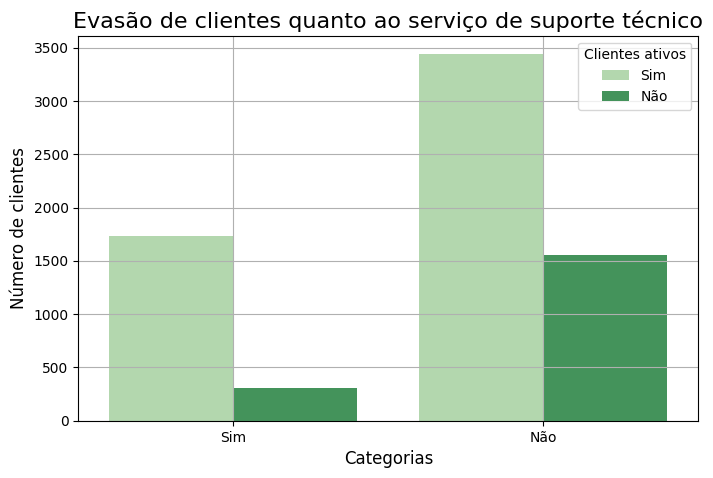

83,4% não tem o serviço de suporte técnico dos clientes inativos.


A elevada proporção de clientes inativos sem serviços complementares indica baixo engajamento e menor percepção de valor do serviço contratado, fatores amplamente associados à maior propensão à evasão em serviços de telecomunicações. A ausência de suporte técnico e de soluções preventivas sugere uma relação frágil com a operadora, facilitando o cancelamento diante de falhas ou ofertas concorrentes.

Exemplo: No caso de cliente que não tenha o serviço de suporte técnico, e na ocorrência de problema técnico de provedor de internet, o tempo de latência na resolução pode ser maior, causamento maior insatisfação com o serviço.

A insatisfação do cliente com o serviço, associado ao fato de que clientes sem parceiro ou dependentes podem ter facilidade no distrato, é um ponto de atenção.

* Agrupamento pela variável cliente_ativo ('churn') quanto ao serviço adicional de TV a cabo


| Ativo  | Tv a cabo | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | Sim  |  814  | 43,6%  
|     | Não | 1055   | 56,4%   
| Sim  | Sim  | 1893   | 36,6%   
|   | Não | 3281   |  63,4%  

A maioria dos clientes, qual seja sua classificação, não tem serviço de TV a cabo, assim como não tem serviço de streaming de filmes.

* Agrupamento pela variável cliente_ativo ('churn') quanto ao serviço adicional de Streaming de filmes

| Ativo  | Streaming de filmes | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | Sim  |  818  | 43,8%  
|     | Não | 1051   | 56,2%   
| Sim  | Sim  | 1914   | 37%   
|   | Não | 3260   |  63%  

* Agrupamento pela variável cliente_ativo ('churn') quanto ao tipo de contrato

| Ativo  | Tipo de contrato | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | Mensal  |  1655  | 88,6%  
|     | Anual | 166   | 8,9%  
|     | Bienal | 48   | 2,6%   
| Sim   | Mensal  |  2220  | 42,9%  
|     | Anual | 1307   | 31,8%  
|     | Bienal | 1647   | 25,3%   

Os contratos mensais são o maior percentual de ocorrências. No entanto, para os clientes inativos é majoritário este contrato. Percebemos que, quanto aos clientes ativos, os números são balanceados.

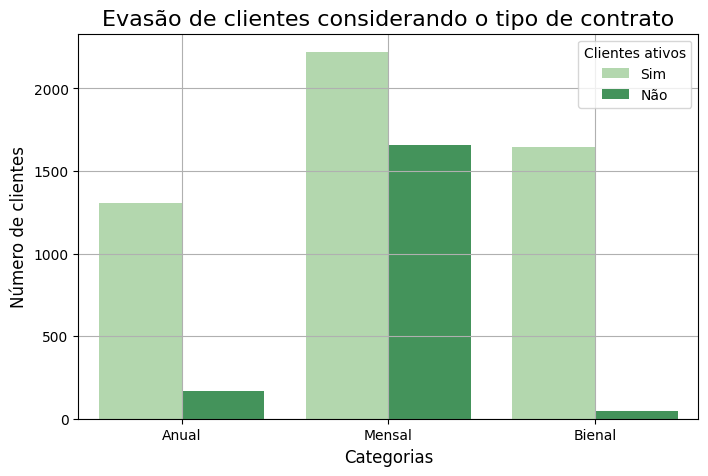

* Agrupamento pela variável cliente_ativo ('churn') quanto ao tipo de fatura




A mesma linha acontece com o acesso online da fatura. Os clientes inativos destacam que 74,9% recebiam a fatura por meio digital.

| Ativo  | Fatura digital | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | Sim  |  1400  | 74,9%
|     | Não | 469   | 25,1%  
| Sim   | Sim  |  2771  | 53,6%  
|     | Não | 2403   | 46,4%  

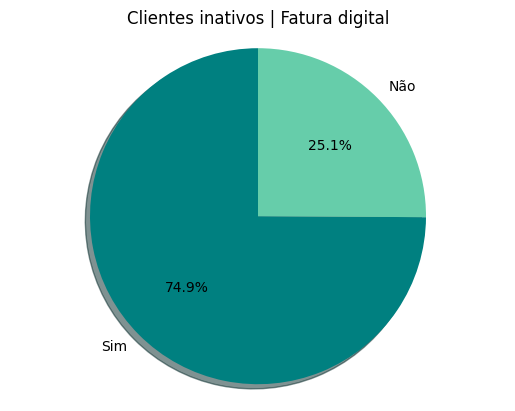

* Agrupamento pela variável cliente_ativo ('churn') quanto ao valor de fatura mensal



| Valor  | Inativo  | Ativo |
|--------|--------------|---------|
| Média   | 74,44  | 61,26  |
| Minimo  | 18,85 | 18,25
| 25%    | 56,15  | 25,10
| 50%    | 79,65  | 64,43
| 75%    | 94,2 | 88,4
| 100%  | 118,35  |  118,75



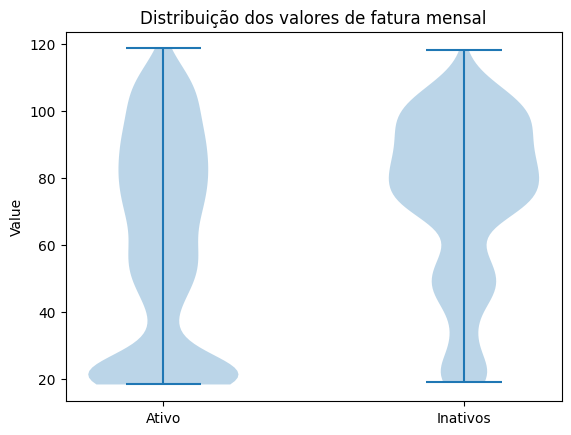

Clientes que evadiram pagavam, em média, mais caro que os clientes que permanecem ativos.

Segue a distribuição da quantidade de clientes inativos de acordo com a faixa de fatura.

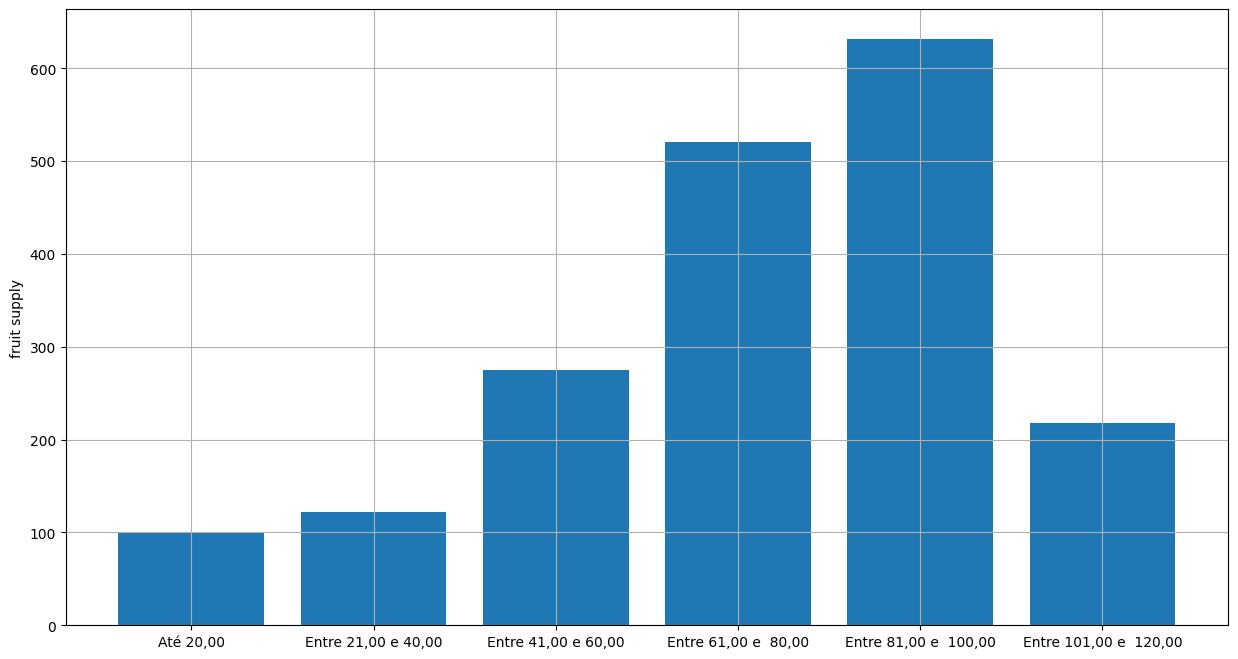

* Agrupamento pela variável cliente_ativo ('churn') quanto ao meio de pagamento

A Telecom X aceita como pagamento:

*   Cheque eletrônico
*   Cheque via correio
*   Transferência bancária (automático)
*   Cartão de crédito (automático)




| Ativo  | Meio de pagamento | Frequência | Percentual |
|--------|--------------|---------|-----|
| Não   | Cheque eletrônico  |  1071  | 57,3%
|     | Cheque via correio | 308   | 16,5%  
|     | Transferência bancária (automático) | 258   | 13,8%
|     | Cartão de crédito (automático) | 232   | 12,4%
| Sim   | Cheque eletrônico  |  1294  | 25%
|     | Cheque via correio | 1304   | 25,2%  
|     | Transferência bancária (automático) | 1286   | 24,9%
|     | Cartão de crédito (automático) | 1290   | 23,4%


Considerando os clientes ativos, os meios de pagamento são balanceados: todos os meios tem uma participação próxima de 1/4. Para os clientes inativo, é majoritário o uso do cheque eletrônico.


Se tomarmos os meios automáticos e não automáticos (Cheque eletrônico	e 	Cheque via correio), os clientes inativos optaram principalmente por meios não automáticos.



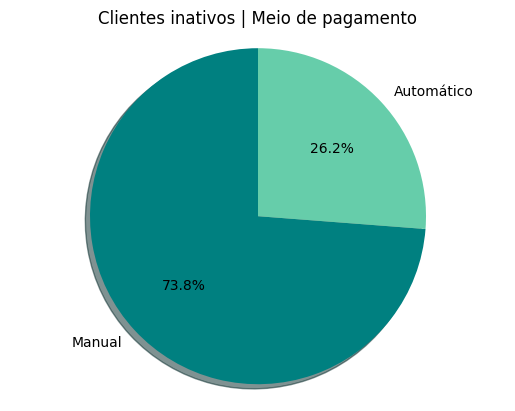

###  **Conclusões**

Os dados indicam que 88,6% dos clientes inativos possuíam contrato mensal, e que a evasão ocorre, precipuamente, antes dos 20 meses, com média de apenas 17 meses.

Contratos mensão são contratos flexíveis em que as partes têm facilidade de rescindir sem consequências contratuais.

Este tipo de contrato aumenta o risco de evasão comercial, pois o cliente não tem fidelidade ou multa rescisória significativa e pode decidir cancelar o serviço a qualquer momento se encontrar uma oferta melhor na concorrência ou se tiver problemas com o serviço (a falta de uma resposta rápida ou mesmo de uma solução completa).

Neste passo, é importante garantir a satisfação do cliente através de processos de melhoria contínua e entregar valor constantemente.

Se estes contratos puderem se tornar, ao longo do tempo, contratos de longo prazo com fidelidade, funcionarão como uma barreira contratual à evasão, mas sem a percepção de uma ‘prisão’ contratual e sim dos benefícios cumulativos por tempo de permanência.


Clientes inativos apresentam 73,8% de uso de meios de pagamento não automáticos, contra 50,2% dos ativos.

Meios de pagamento não automáticos aumentam a fricção operacional e exigem uma decisão ativa recorrente do cliente, o que eleva a probabilidade de evasão, seja por inadimplência involuntária ou por abandono deliberado.

Já os meios automáticos reduzem o esforço imediato, postergando a decisão de evasão, mas não eliminando a sensibilidade ao valor percebido ao longo do tempo.

Se o cliente paga com cartão de crédito é uma decisão que pode ser postergada, e quando executada, ainda depende de um procedimento próprio.

É importante o incentivo à migração para meios automáticos, como ofertas exclusivas para cartão de crédito assim como descontos e comunicação clara sobre a conveniência e segurança da escolha de meios automáticos.


Clientes inativos apresentam fatura média e mediana superiores às dos ativos.
O preço, de forma isolada, sem a percepção do valor agregado, pode ser um fator determinante no cancelamento, associado ao aumento da fatura considerando o custo-benefício do serviço em comparação com a oferta da concorrência.


Os serviços adicionais (segurança, backup, suporte técnico) apresentam adesão muito menor entre clientes inativos, com diferenças superiores a 15 pontos percentuais em alguns casos.

A ausência de serviços adicionais reduz o vínculo do cliente com a empresa, aumentando sua vulnerabilidade à evasão, especialmente quando a experiência principal não é excepcional.

Por isso, é necessário que a experiência do usuário não se alie a um atendimento ruim ou ineficiência em resolver problemas, principais motivos para perdas de clientes, pelo contrário, atendimento ágil e empático, foco na excelência profissional e no relacionamento com o cliente.

São opções as ofertas combinadas de serviços, como internet, com serviços adicionais, como suporte técnico, além de serviços adicionais gratuitos durante um período, por exemplo. É importante que o cliente perceba o valor dos serviços para a qualidade geral do serviço e queira manter sua fidelidade a empresa.


No perfil humano, notamos que 64,2% não tem parceiro e 82,4% não tem dependentes, e pode ser considerado no conjunto de ações, ou seja, não podemos nos esquecer que o cliente é uma pessoa sem parceiro ou cônjuge e sem dependentes e combinar ações para a fidelização de clientes.

Uma medida que pode gerar bons resultados é a criação/fortalecimento de um programa de onboarding, ou seja, a recepção dos clientes com um verdadeiro acolhimento.

Por fim, o monitoramento contínuo do comportamento dos clientes - utilizando algoritmos de machine learning e recursos de inteligência artificial - para prever a evasão, o monitoramento do mercado e criação de ações personalizadas.

O que é customizado, tem um valor para o cliente, ele percebe que não é apenas um número no cadastro da empresa ou um pagador de fatura. Tem o condão do pertencimento, que gera fidelidade. À medida do possível, as ações personalizadas também trazem as preocupações quanto às necessidades dos clientes.


